# *Caso de Estudio Nhanes* #

El Estudio Nacional de Examen de Salud y Nutrición (National Health and Nutrition Examination Survey, NHANES) es un programa de encuestas diseñado para evaluar la salud y el estado nutricional de adultos y niños en los Estados Unidos. A través de entrevistas y exámenes físicos, NHANES recopila datos que ayudan a comprender las condiciones prevalentes en la población, como enfermedades crónicas, deficiencias nutricionales, y problemas de salud mental, incluyendo la depresión.

## *Etapa 1: Comprensión del Negocio*

El objetivo de este estudio es (rellenar)

### Inicio

In [6]:
%load_ext kedro.ipython
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import mstats
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [7]:
demografia = catalog.load("demografia")
insulina = catalog.load("insulina")
colesterol = catalog.load("colesterol")
depresion = catalog.load("depresion")
proteinaC = catalog.load("proteinaC")
perfilB = catalog.load("perfilBioquimico")
scaler = StandardScaler()
minmax = MinMaxScaler()
pt = PowerTransformer(method='yeo-johnson')

[09/08/24 15:21:31] INFO     Loading data from demografia (ParquetDataset)...                   ]8;id=708202;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=313501;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from insulina (ParquetDataset)...                     ]8;id=31800;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=186157;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from colesterol (ParquetDataset)...                   ]8;id=466423;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=844751;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from depresion (ParquetDataset)...                    ]8;id=971616;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=201659;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from proteinaC (ParquetDataset)...                    ]8;id=885152;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=769766;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from perfilBioquimico (ParquetDataset)...             ]8;id=152674;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=977295;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

In [8]:
for columna in demografia.columns:
    print(f"------------ Columna {columna} ------------\n {demografia[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count     15560.00000
mean     117042.50000
std        4491.92943
min      109263.00000
25%      113152.75000
50%      117042.50000
75%      120932.25000
max      124822.00000
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna SDDSRVYR ------------
 count    15560.0
mean        66.0
std          0.0
min         66.0
25%         66.0
50%         66.0
75%         66.0
max         66.0
Name: SDDSRVYR, dtype: float64
 ------------------------------------ 

------------ Columna RIDSTATR ------------
 count    15560.000000
mean         1.919023
std          0.272808
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: RIDSTATR, dtype: float64
 ------------------------------------ 

------------ Columna RIAGENDR ------------
 count    15560.000000
mean         1.503792
std          0.500002
min          1.000000
25%          1.000000
50%          2.000000

In [9]:
for columna in insulina.columns:
    print(f"------------ Columna {columna} ------------\n {insulina[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count      5090.000000
mean     117177.326523
std        4487.335243
min      109264.000000
25%      113303.500000
50%      117265.500000
75%      121046.500000
max      124822.000000
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna WTSAFPRP ------------
 count    5.090000e+03
mean     5.388396e+04
std      6.853813e+04
min      5.397605e-79
25%      1.730597e+04
50%      3.284510e+04
75%      6.213588e+04
max      7.412592e+05
Name: WTSAFPRP, dtype: float64
 ------------------------------------ 

------------ Columna LBXIN ------------
 count    4625.000000
mean       14.975684
std        22.845041
min         0.710000
25%         6.310000
50%        10.180000
75%        16.610000
max       512.500000
Name: LBXIN, dtype: float64
 ------------------------------------ 

------------ Columna LBDINSI ------------
 count    4625.000000
mean       89.854106
std       137.070249
min         4.260000
25%        37.

In [10]:
for columna in colesterol.columns:
    print(f"------------ Columna {columna} ------------\n {colesterol[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count     12198.000000
mean     117082.953107
std        4498.674913
min      109264.000000
25%      113178.250000
50%      117098.500000
75%      120994.750000
max      124822.000000
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna LBXTC ------------
 count    10828.000000
mean       177.463521
std         40.355743
min         71.000000
25%        149.000000
50%        173.000000
75%        201.000000
max        446.000000
Name: LBXTC, dtype: float64
 ------------------------------------ 

------------ Columna LBDTCSI ------------
 count    10828.000000
mean         4.589243
std          1.043624
min          1.840000
25%          3.850000
50%          4.470000
75%          5.200000
max         11.530000
Name: LBDTCSI, dtype: float64
 ------------------------------------ 



In [11]:
for columna in depresion.columns:
    print(f"------------ Columna {columna} ------------\n {depresion[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count      8965.000000
mean     117107.849637
std        4501.048325
min      109266.000000
25%      113211.000000
50%      117091.000000
75%      121022.000000
max      124822.000000
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna DPQ010 ------------
 count    8.308000e+03
mean     3.952817e-01
std      8.022101e-01
min      5.397605e-79
25%      5.397605e-79
50%      5.397605e-79
75%      1.000000e+00
max      9.000000e+00
Name: DPQ010, dtype: float64
 ------------------------------------ 

------------ Columna DPQ020 ------------
 count    8.306000e+03
mean     3.727426e-01
std      7.581775e-01
min      5.397605e-79
25%      5.397605e-79
50%      5.397605e-79
75%      1.000000e+00
max      9.000000e+00
Name: DPQ020, dtype: float64
 ------------------------------------ 

------------ Columna DPQ030 ------------
 count    8.306000e+03
mean     6.609680e-01
std      9.920385e-01
min      5.397605e-79
25%  

In [12]:
for columna in proteinaC.columns:
    print(f"------------ Columna {columna} ------------\n {proteinaC[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count     13772.000000
mean     117079.858844
std        4498.549164
min      109263.000000
25%      113184.750000
50%      117104.500000
75%      120981.250000
max      124822.000000
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna LBXHSCRP ------------
 count    11614.000000
mean         3.422093
std          7.792654
min          0.110000
25%          0.520000
50%          1.320000
75%          3.620000
max        246.860000
Name: LBXHSCRP, dtype: float64
 ------------------------------------ 

------------ Columna LBDHRPLC ------------
 count    1.161400e+04
mean     3.426899e-02
std      1.819271e-01
min      5.397605e-79
25%      5.397605e-79
50%      5.397605e-79
75%      5.397605e-79
max      1.000000e+00
Name: LBDHRPLC, dtype: float64
 ------------------------------------ 



In [13]:
demografia.columns


Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDYRUSZ', 'DMDEDUC2',
       'DMDMARTZ', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG',
       'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA',
       'WTINTPRP', 'WTMECPRP', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR'],
      dtype='object')

# Creación de dataframe con Id, Edad, Género, Raza, Educación, Estado Civil, Nivel de Pobreza

In [14]:
consideracion = pd.DataFrame()
consideracion["ID"] = demografia["SEQN"]
consideracion["Edad"] = demografia["RIDAGEYR"]
consideracion["Genero"] = demografia["RIAGENDR"] #1 = hombre; 2= mujer
consideracion["Raza"] = demografia["RIDRETH3"] # 1 = mexico; 2 = otro hispano; 3 = Blanco; 4= negro; 6= asiatico; 7 = otro
consideracion["Educacion"] = demografia["DMDEDUC2"] #ver nhanes
consideracion["EstadoCivil"] = demografia["DMDMARTZ"]
consideracion["NivelPobreza"] = demografia["INDFMPIR"]

In [15]:
pd.options.display.float_format = '{:.2f}'.format
consideracion[consideracion["NivelPobreza"]<1]

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza
1,109264.00,13.00,2.00,1.00,NaN,NaN,0.83
6,109269.00,2.00,1.00,2.00,NaN,NaN,0.96
9,109272.00,0.00,1.00,1.00,NaN,NaN,0.73
10,109273.00,36.00,1.00,3.00,4.00,3.00,0.83
13,109276.00,0.00,1.00,4.00,NaN,NaN,0.00
...,...,...,...,...,...,...,...
15524,124787.00,19.00,2.00,4.00,NaN,NaN,0.80
15529,124792.00,32.00,1.00,2.00,5.00,3.00,0.00
15535,124798.00,55.00,1.00,2.00,1.00,3.00,0.80
15543,124806.00,4.00,2.00,4.00,NaN,NaN,0.38


In [16]:
for columna in consideracion.columns:
    if consideracion[columna].isna().sum() != 0:
        print(f"Columna {columna} tiene {consideracion[columna].isna().sum()} NaN")

Columna Educacion tiene 6328 NaN
Columna EstadoCivil tiene 6328 NaN
Columna NivelPobreza tiene 2201 NaN


In [17]:
consideracion.loc[consideracion["Edad"] <= 13, "Educacion"] = consideracion.loc[consideracion["Edad"] <= 13, "Educacion"].fillna(1)
consideracion.loc[consideracion["Edad"] <= 18, "Educacion"] = consideracion.loc[consideracion["Edad"] <= 18, "Educacion"].fillna(2)
consideracion.loc[consideracion["Edad"] <= 18, "EstadoCivil"] = consideracion.loc[consideracion["Edad"] <= 18, "EstadoCivil"].fillna(3)

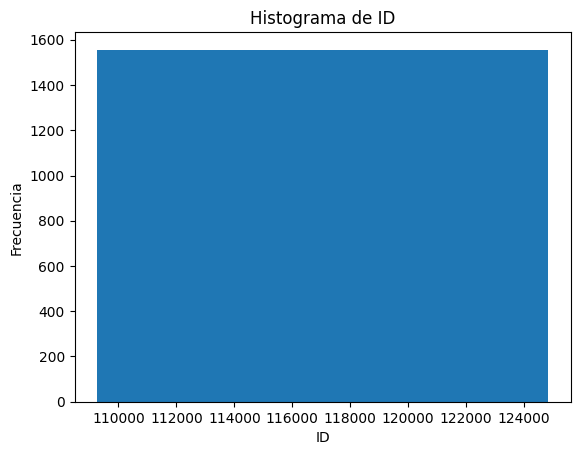

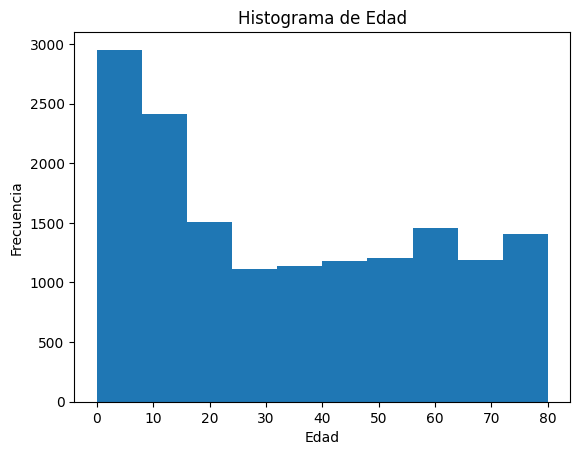

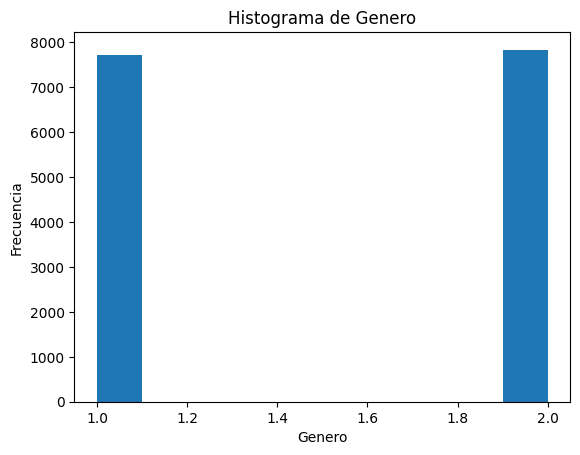

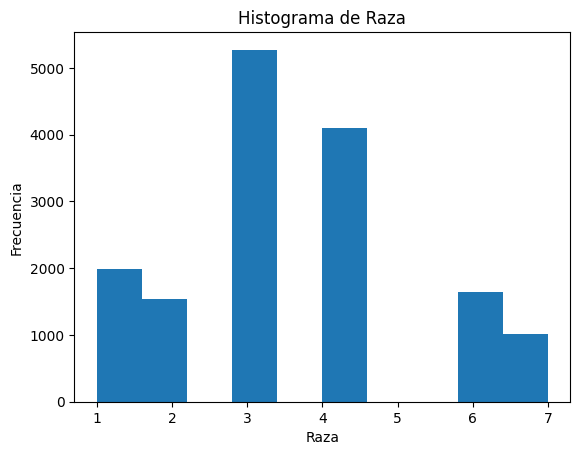

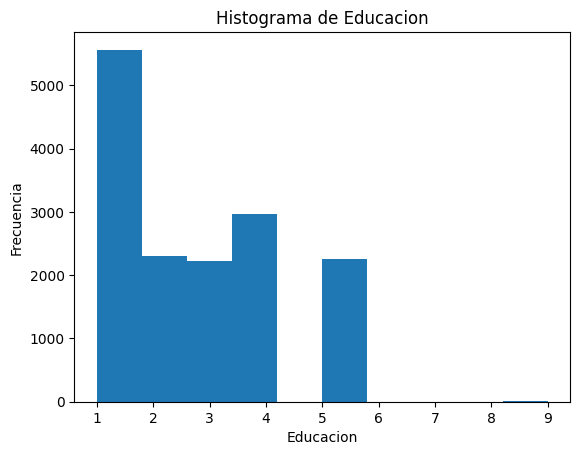

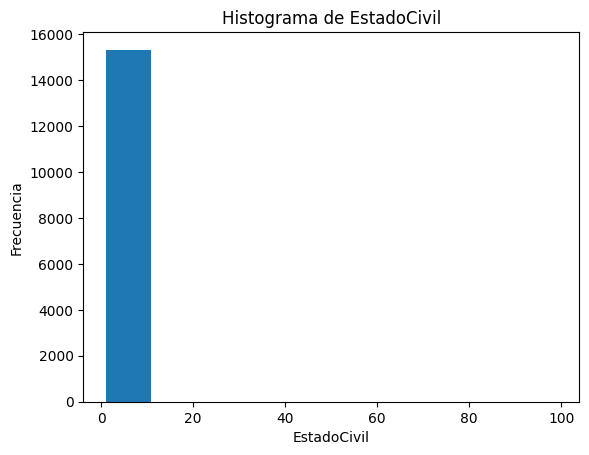

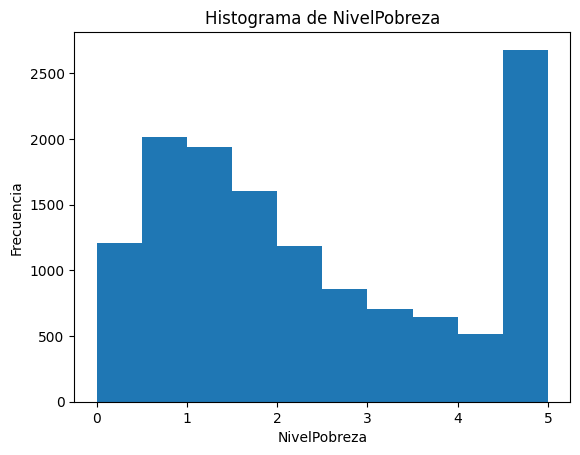

In [18]:
for col in consideracion.columns:
  plt.hist(consideracion[col])
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [19]:
consideracion = consideracion.loc[consideracion['NivelPobreza'] <5]

In [20]:
pobreza_escalado = scaler.fit_transform(consideracion[['NivelPobreza']])
pobreza_minmax = minmax.fit_transform(consideracion[['NivelPobreza']])
pobreza_pt = pt.fit_transform(consideracion[['NivelPobreza']])
pobreza_sqrt = np.sqrt(consideracion[['NivelPobreza']])
pobreza_boxcox, _ = stats.boxcox(consideracion["NivelPobreza"] + 1)
log_data = np.log1p(consideracion[['NivelPobreza']])

In [21]:
for pobre in [pobreza_boxcox,log_data,pobreza_escalado,pobreza_minmax,pobreza_pt,pobreza_sqrt]:
    df = pd.DataFrame(pobre)
    print(df.describe())

             0
count 11213.00
mean      1.03
std       0.50
min       0.00
25%       0.66
50%       1.02
75%       1.42
max       1.96
       NivelPobreza
count      11213.00
mean           0.97
std            0.45
min            0.00
25%            0.64
50%            0.97
75%            1.32
max            1.79
             0
count 11213.00
mean      0.00
std       1.00
min      -1.49
25%      -0.79
50%      -0.21
75%       0.65
max       2.39
             0
count 11213.00
mean      0.38
std       0.26
min       0.00
25%       0.18
50%       0.33
75%       0.55
max       1.00
             0
count 11213.00
mean      0.00
std       1.00
min      -2.08
25%      -0.74
50%      -0.02
75%       0.77
max       1.88
       NivelPobreza
count      11213.00
mean           1.29
std            0.50
min            0.00
25%            0.95
50%            1.28
75%            1.66
max            2.23


[09/08/24 15:21:32] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=941975;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=641701;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=186602;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=76607;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=495846;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=616331;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=270624;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=395307;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

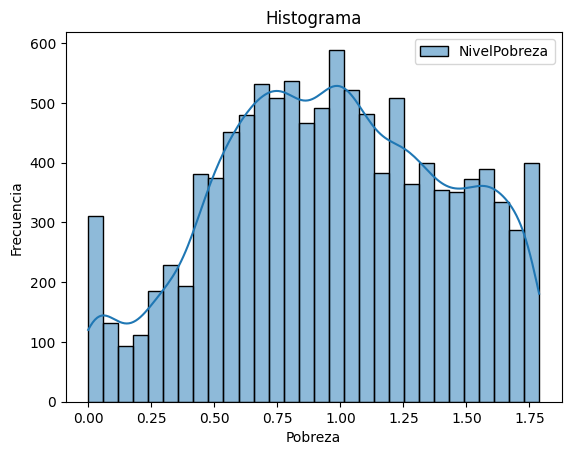

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=301110;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=580486;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=198948;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=577540;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

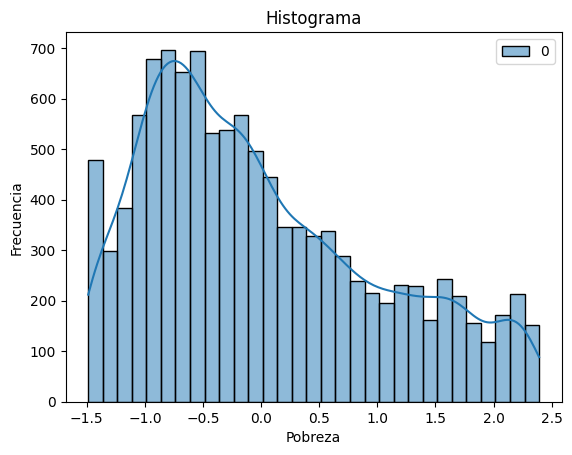

[09/08/24 15:21:33] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=985300;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=609529;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=251047;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=250125;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

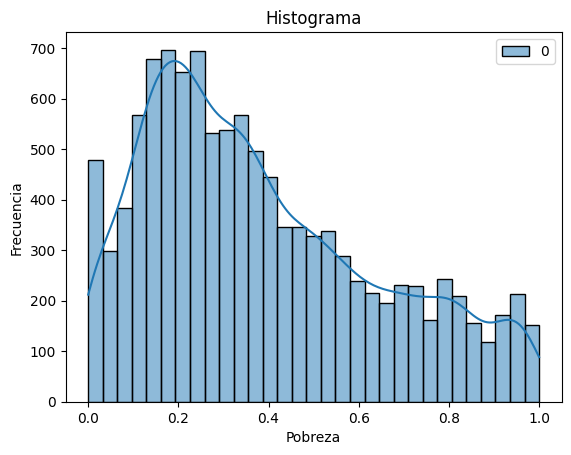

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=35781;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=324177;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=34540;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=827639;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

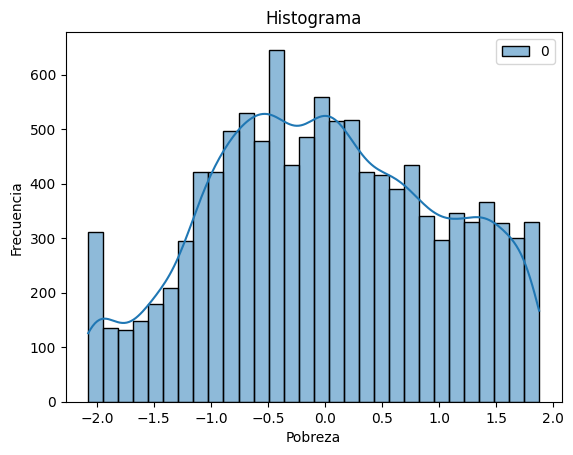

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=723147;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=536260;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=434565;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=221441;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=891063;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=801306;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=956306;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=718728;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

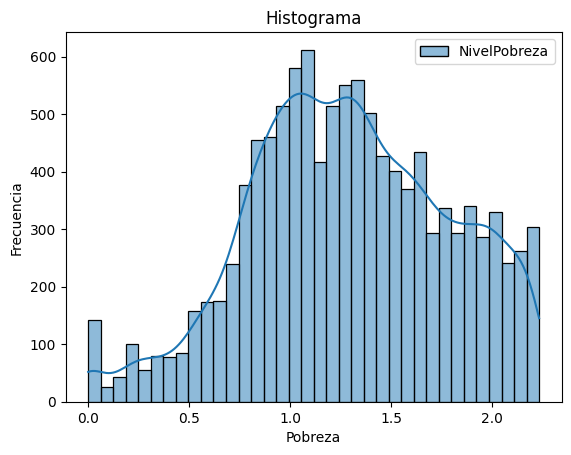

In [22]:
for pobre in [log_data,pobreza_escalado,pobreza_minmax,pobreza_pt,pobreza_sqrt]:
    sns.histplot(data=pobre, kde=True)
    plt.title(f'Histograma')
    plt.xlabel("Pobreza")
    plt.ylabel('Frecuencia')
    plt.show()

In [23]:
consideracion['NivelPobreza'] = pobreza_sqrt

In [24]:
knn_imputer = KNNImputer(n_neighbors=10, weights="uniform")
consideracion['NivelPobreza'] = knn_imputer.fit_transform(pobreza_sqrt[['NivelPobreza']])
consideracion

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza
0,109263.00,2.00,1.00,6.00,1.00,3.00,2.16
1,109264.00,13.00,2.00,1.00,1.00,3.00,0.91
2,109265.00,2.00,1.00,3.00,1.00,3.00,1.75
5,109268.00,18.00,2.00,3.00,2.00,3.00,1.29
6,109269.00,2.00,1.00,2.00,1.00,3.00,0.98
...,...,...,...,...,...,...,...
15554,124817.00,67.00,2.00,1.00,2.00,1.00,1.48
15555,124818.00,40.00,1.00,4.00,5.00,1.00,1.95
15556,124819.00,2.00,1.00,4.00,1.00,3.00,0.26
15557,124820.00,7.00,2.00,3.00,1.00,3.00,1.10


In [25]:
consideracion["NivelPobreza"].describe()


count   11213.00
mean        1.29
std         0.50
min         0.00
25%         0.95
50%         1.28
75%         1.66
max         2.23
Name: NivelPobreza, dtype: float64

In [26]:
consideracion.isna().sum()


ID                0
Edad              0
Genero            0
Raza              0
Educacion       173
EstadoCivil     173
NivelPobreza      0
dtype: int64

In [27]:
#consideracion = consideracion.dropna()

In [28]:
consideracion["Educacion"].isna().sum()

np.int64(173)

In [29]:
consideracion["NivelPobreza"].describe()


count   11213.00
mean        1.29
std         0.50
min         0.00
25%         0.95
50%         1.28
75%         1.66
max         2.23
Name: NivelPobreza, dtype: float64

# Combinación de dataset con Insulina

In [30]:
insulina['SEQN'] = insulina['SEQN'].astype(int)
insulina = insulina.rename(columns={'SEQN': 'ID'})
insulina = insulina.rename(columns={'WTSAFPRP': "Peso de Submuestra en Ayunas"})
insulina = insulina.rename(columns={'LBXIN': "Insulina (μU/mL)"})
insulina = insulina.rename(columns={'LBDINSI': "Insulina (pmol/L)"})
insulina = insulina.rename(columns={'LBDINLC': "Código de Comentario de Insulina"})


In [31]:
consideracion_insulina = pd.merge(consideracion, insulina, on='ID', how='inner')

In [32]:
consideracion_insulina.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina
count,3650.00,3650.00,3650.00,3650.00,3582.00,3582.00,3650.00,3650.00,3307.00,3307.00,3307.00
mean,117187.07,43.93,1.52,3.45,3.12,1.87,1.33,48912.22,15.45,92.69,0.00
std,4467.37,20.82,0.50,1.62,1.25,0.88,0.48,60974.78,23.11,138.67,0.05
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,0.00
25%,113370.75,25.00,1.00,3.00,2.00,1.00,1.00,16798.02,6.49,38.94,0.00
50%,117331.50,44.00,2.00,3.00,3.00,2.00,1.31,31798.15,10.38,62.28,0.00
75%,121059.25,62.00,2.00,4.00,4.00,3.00,1.68,57227.95,17.15,102.90,0.00
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,741259.19,485.10,2910.60,1.00


In [33]:
Q1 = consideracion_insulina["Insulina (μU/mL)"].quantile(0.25)
Q3 = consideracion_insulina["Insulina (μU/mL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = consideracion_insulina[(consideracion_insulina["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina["Insulina (μU/mL)"] > upper_bound)]

# Removing outliers
consideracion_insulina_limpio = consideracion_insulina[~((consideracion_insulina["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina["Insulina (μU/mL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)


 El IQR es 10.659999999999998. El límite inferior es: -9.499999999999998, el superior es 33.14
227


In [34]:
Q1 = consideracion_insulina_limpio["Insulina (μU/mL)"].quantile(0.25)
Q3 = consideracion_insulina_limpio["Insulina (μU/mL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = consideracion_insulina_limpio[(consideracion_insulina_limpio["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina_limpio["Insulina (μU/mL)"] > upper_bound)]

# Removing outliers
insulina_limpio = consideracion_insulina_limpio[~((consideracion_insulina_limpio["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina_limpio["Insulina (μU/mL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)

 El IQR es 8.952499999999999. El límite inferior es: -7.188749999999997, el superior es 28.621249999999996
91


In [35]:
insulina_limpio.isna().sum()


ID                                    0
Edad                                  0
Genero                                0
Raza                                  0
Educacion                            59
EstadoCivil                          59
NivelPobreza                          0
Peso de Submuestra en Ayunas          0
Insulina (μU/mL)                    343
Insulina (pmol/L)                   343
Código de Comentario de Insulina    343
dtype: int64

In [36]:
insulina_limpio.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina
count,3332.00,3332.00,3332.00,3332.00,3273.00,3273.00,3332.00,3332.00,2989.00,2989.00,2989.00
mean,117201.71,44.08,1.52,3.48,3.12,1.87,1.33,49067.66,10.94,65.66,0.00
std,4464.66,20.88,0.50,1.62,1.26,0.88,0.49,61251.29,6.22,37.33,0.05
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,0.00
25%,113395.75,25.00,1.00,3.00,2.00,1.00,1.00,16954.33,6.17,37.02,0.00
50%,117358.50,44.00,2.00,3.00,3.00,2.00,1.32,31798.15,9.59,57.54,0.00
75%,121054.00,62.00,2.00,4.00,4.00,3.00,1.69,57008.16,14.47,86.82,0.00
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,741259.19,28.51,171.06,1.00


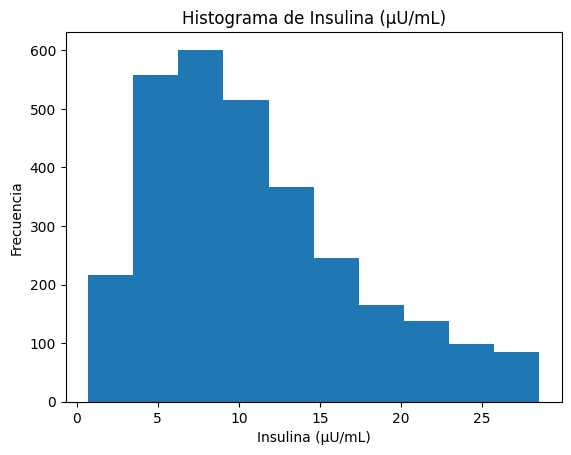

In [37]:
plt.hist(insulina_limpio["Insulina (μU/mL)"])
plt.title(f'Histograma de {"Insulina (μU/mL)"}')
plt.xlabel("Insulina (μU/mL)")
plt.ylabel('Frecuencia')
plt.show()

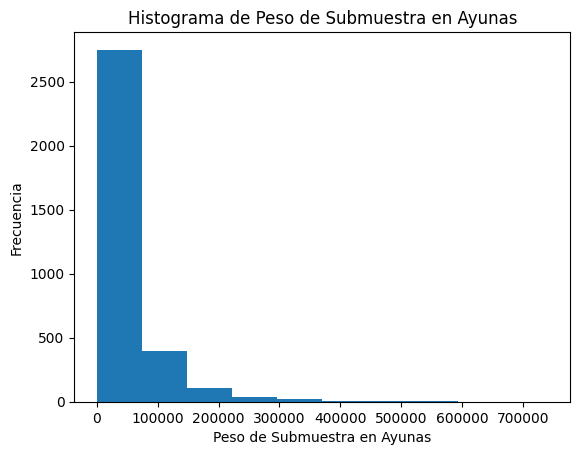

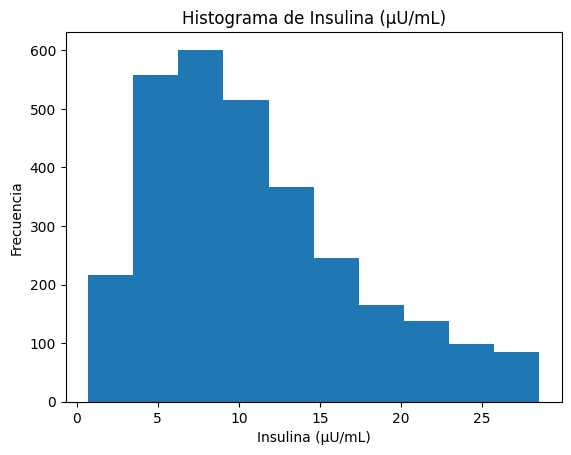

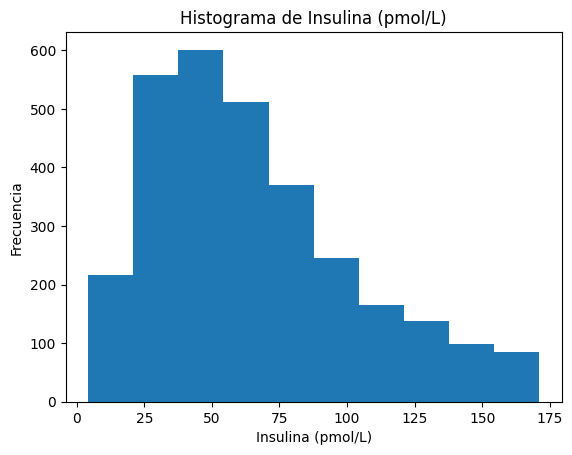

In [38]:
for col in insulina_limpio.columns[7:-1]:
  plt.hist(insulina_limpio[col])
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [39]:
escalado = scaler.fit_transform(insulina_limpio[["Insulina (μU/mL)"]])
minmaxesc = minmax.fit_transform(insulina_limpio[["Insulina (μU/mL)"]])
powerTrans = pt.fit_transform(insulina_limpio[["Insulina (μU/mL)"]])

In [40]:
insulina_escalado = insulina_limpio.copy()
insulina_minmax = insulina_limpio.copy()
insulina_power = insulina_limpio.copy()
insulina_escalado["Insulina (μU/mL)"]=escalado
insulina_minmax["Insulina (μU/mL)"]=minmaxesc
insulina_power["Insulina (μU/mL)"]=powerTrans

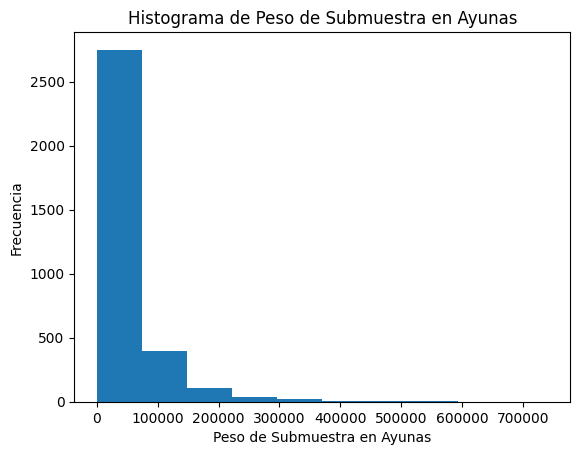

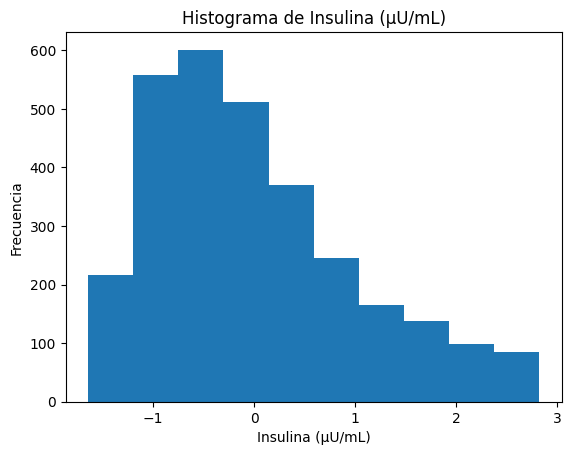

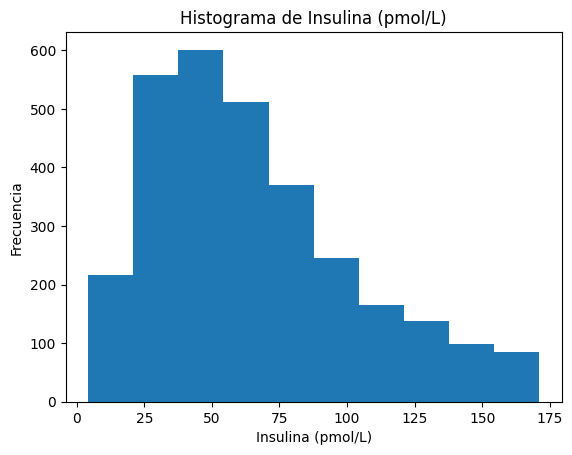

In [41]:
for col in insulina_escalado.columns[7:-1]:
  plt.hist(insulina_escalado[col])
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

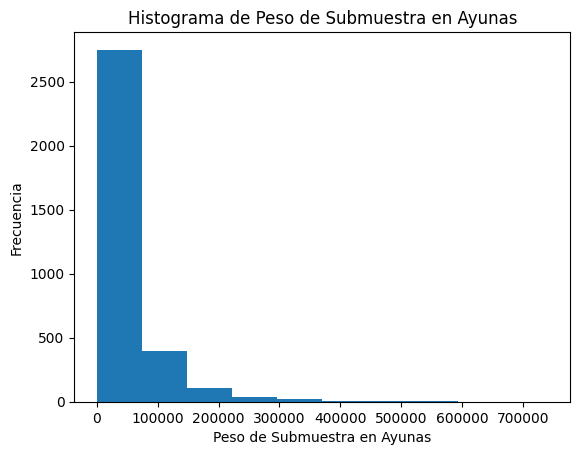

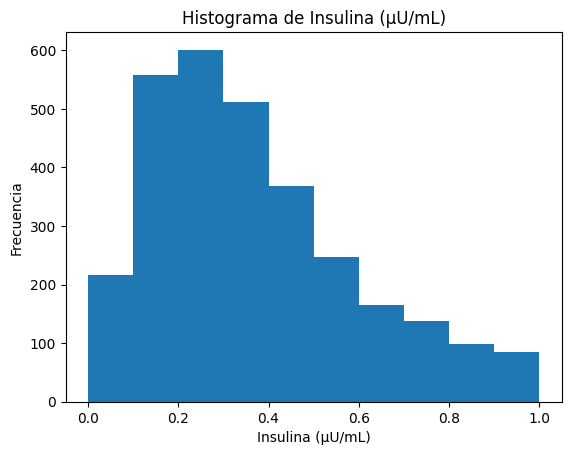

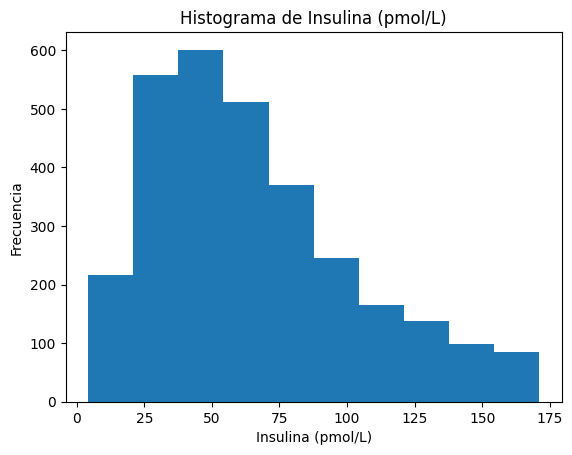

In [42]:
for col in insulina_minmax.columns[7:-1]:
  plt.hist(insulina_minmax[col])
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [43]:
Q1 = insulina_escalado["Insulina (μU/mL)"].quantile(0.25)
Q3 = insulina_escalado["Insulina (μU/mL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = insulina_escalado[(insulina_escalado["Insulina (μU/mL)"] < lower_bound) | (insulina_escalado["Insulina (μU/mL)"] > upper_bound)]

# Removing outliers
limpieza_insulina = insulina_escalado[~((insulina_escalado["Insulina (μU/mL)"] < lower_bound) | (insulina_escalado["Insulina (μU/mL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)

 El IQR es 1.3341734967127177. El límite inferior es: -2.7685061346628896, el superior es 2.5681878521879806
49


In [44]:
limp_ins = limpieza_insulina.copy()
limp_ins["Insulina (μU/mL)"] = pt.fit_transform(limp_ins[["Insulina (μU/mL)"]])

[09/08/24 15:21:35] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=101724;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=617461;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

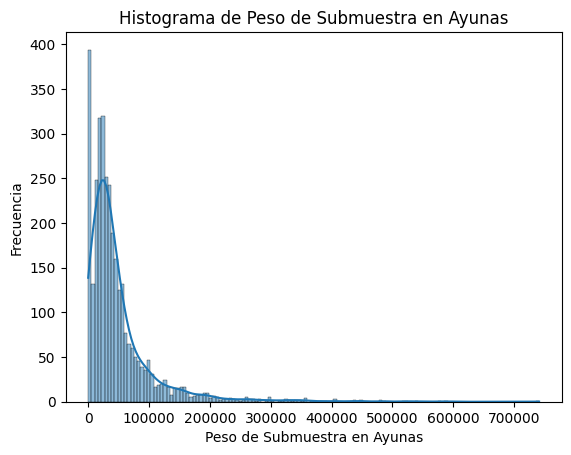

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=252569;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=491306;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

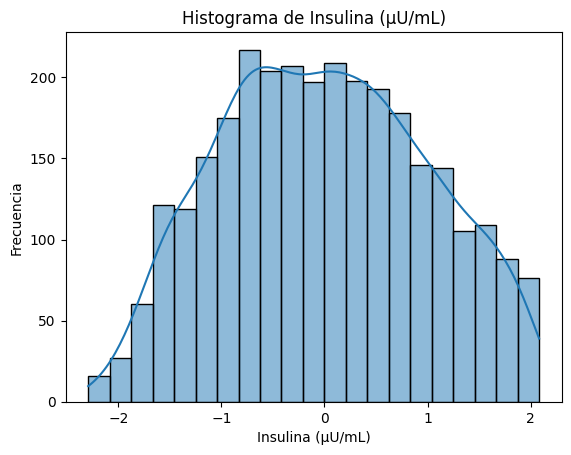

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=731261;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=961162;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

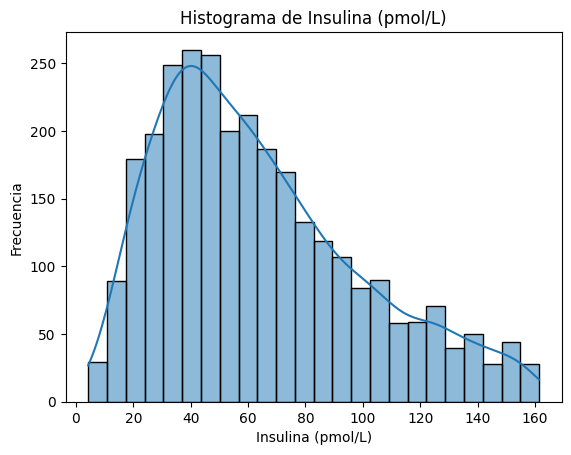

In [45]:
for col in insulina_power.columns[7:-1]:
  sns.histplot(data=limp_ins, x=col, kde=True)
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [46]:
limp_ins.isna().sum()


ID                                    0
Edad                                  0
Genero                                0
Raza                                  0
Educacion                            59
EstadoCivil                          59
NivelPobreza                          0
Peso de Submuestra en Ayunas          0
Insulina (μU/mL)                    343
Insulina (pmol/L)                   343
Código de Comentario de Insulina    343
dtype: int64

In [47]:
knn_imputer = KNNImputer(n_neighbors=10, weights="uniform")
limp_ins["Insulina (μU/mL)"] = knn_imputer.fit_transform(limp_ins[["Insulina (μU/mL)"]])

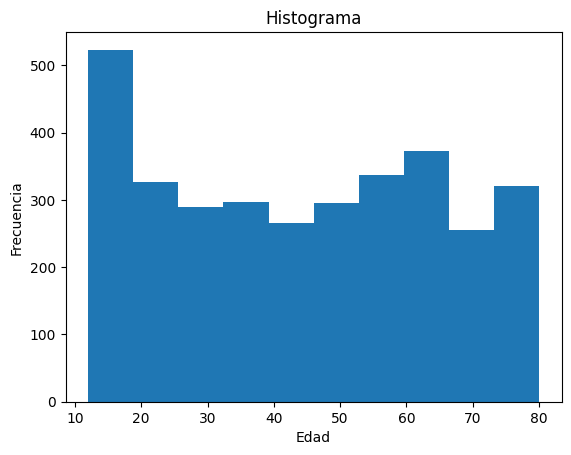

In [48]:
plt.hist(limp_ins["Edad"])
plt.title(f'Histograma')
plt.xlabel("Edad")
plt.ylabel('Frecuencia')
plt.show()

In [49]:

limp_ins["Edad"], lambda_opt = boxcox(limp_ins["Edad"] + 1)

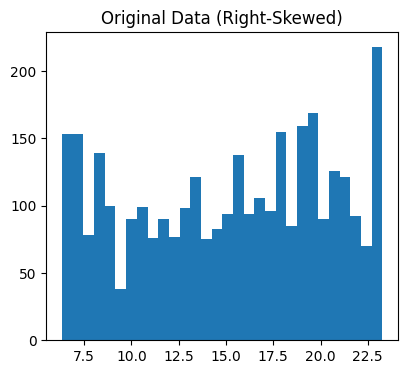

In [50]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(limp_ins["Edad"], bins=30)
plt.title('Original Data (Right-Skewed)')
plt.show()

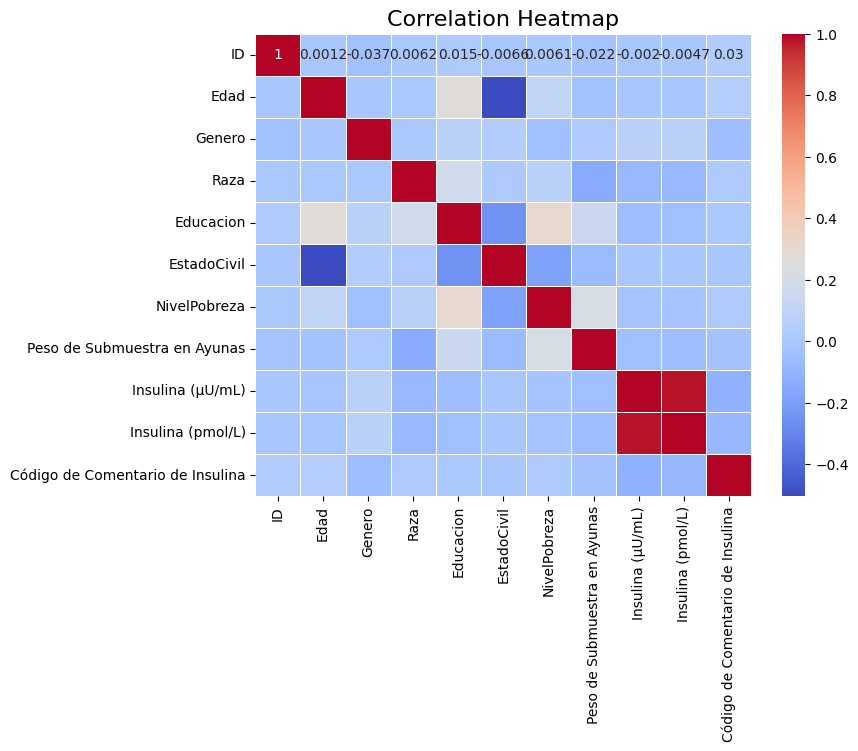

In [51]:
corr_matrix = limp_ins.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Conclusión: SIGUE SIN HABER RELACIÓN >:(

In [52]:
#insulina_nonna = consideracion_insulina.dropna()

# Combinación de Dataset con Colesterol

In [53]:
colesterol = colesterol.rename(columns={
    'SEQN': 'ID',
    'LBXTC': 'Colesterol Total (mg/dL)',
    'LBDTCSI': 'Colesterol Total (mmol/L)'
})

In [54]:
consideracion_colesterol = pd.merge(consideracion, colesterol, on='ID', how='inner')

In [55]:
consideracion_colesterol.head()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Colesterol Total (mg/dL),Colesterol Total (mmol/L)
0,109264.00,13.00,2.00,1.00,1.00,3.00,0.91,166.00,4.29
1,109270.00,11.00,2.00,4.00,1.00,3.00,1.37,103.00,2.66
2,109273.00,36.00,1.00,3.00,4.00,3.00,0.91,164.00,4.24
3,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,105.00,2.72
4,109275.00,6.00,1.00,3.00,1.00,3.00,1.93,167.00,4.32


In [56]:
consideracion_colesterol.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Colesterol Total (mg/dL),Colesterol Total (mmol/L)
count,8850.00,8850.00,8850.00,8850.00,8691.00,8691.00,8850.00,7840.00,7840.00
mean,117107.10,38.22,1.51,3.45,2.77,2.08,1.31,176.14,4.55
std,4477.06,23.35,0.50,1.61,1.38,1.21,0.49,40.15,1.04
min,109264.00,6.00,1.00,1.00,1.00,1.00,0.00,73.00,1.89
25%,113263.50,16.00,1.00,3.00,1.00,1.00,0.97,148.00,3.83
50%,117163.50,36.00,2.00,3.00,3.00,2.00,1.30,171.00,4.42
75%,121016.75,59.00,2.00,4.00,4.00,3.00,1.67,200.00,5.17
max,124821.00,80.00,2.00,7.00,9.00,77.00,2.23,446.00,11.53


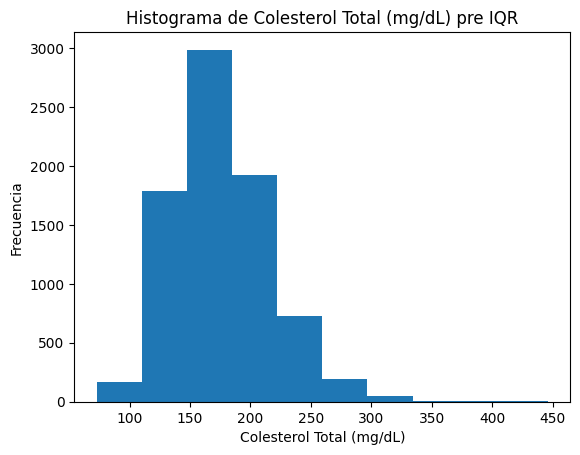

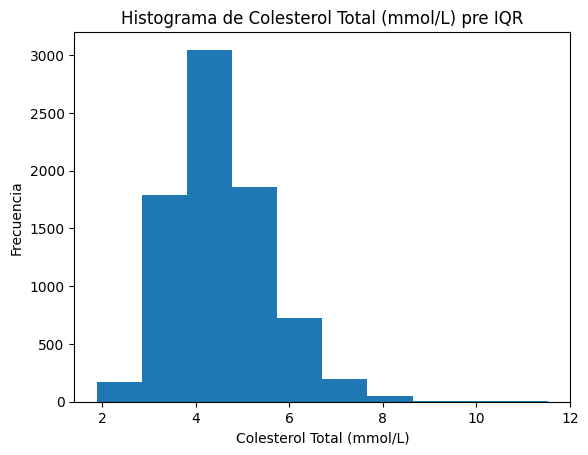

In [57]:
for col in consideracion_colesterol.columns[7:]:
  plt.hist(consideracion_colesterol[col])
  plt.title(f'Histograma de {col} pre IQR')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [58]:
Q1 = consideracion_colesterol["Colesterol Total (mg/dL)"].quantile(0.25)
Q3 = consideracion_colesterol["Colesterol Total (mg/dL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers_colesterol = consideracion_colesterol[(consideracion_colesterol["Colesterol Total (mg/dL)"] < lower_bound) | (consideracion_colesterol["Colesterol Total (mg/dL)"] > upper_bound)]

# Removing outliers
consideracion_colesterol_limpio = consideracion_colesterol[~((consideracion_colesterol["Colesterol Total (mg/dL)"] < lower_bound) | (consideracion_colesterol["Colesterol Total (mg/dL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers_colesterol)

print(num_outliers)

 El IQR es 52.0. El límite inferior es: 70.0, el superior es 278.0
133


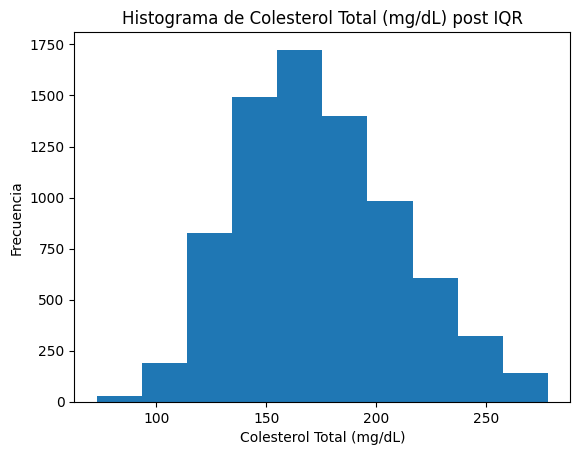

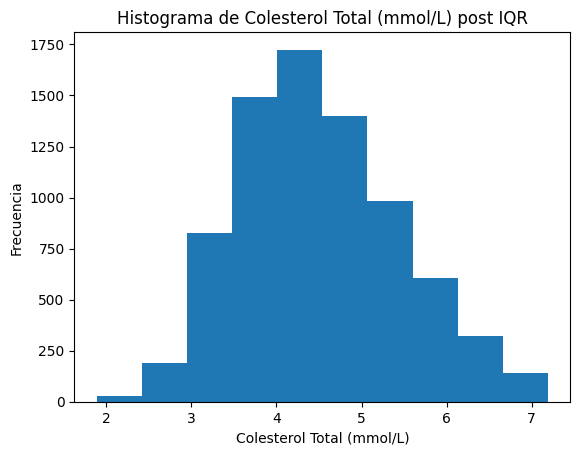

In [59]:
for col in consideracion_colesterol_limpio.columns[7:]:
  plt.hist(consideracion_colesterol_limpio[col])
  plt.title(f'Histograma de {col} post IQR')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

# Combinación de Dataset con Proteína C Spoiler: No pude lograr la distribución normal en la proteína :(

In [60]:
proteinaC = proteinaC.rename(columns={
    'SEQN': 'ID',
    'LBXHSCRP': 'Proteína C Reactiva (mg/L)',
    'LBDHRPLC': 'Código de Comentario de Proteína C Reactiva'
})

In [61]:
consideracion_proteinaC = pd.merge(consideracion, proteinaC, on='ID', how='inner')

In [62]:
consideracion_proteinaC.isna().sum()


ID                                                0
Edad                                              0
Genero                                            0
Raza                                              0
Educacion                                       159
EstadoCivil                                     159
NivelPobreza                                      0
Proteína C Reactiva (mg/L)                     1635
Código de Comentario de Proteína C Reactiva    1635
dtype: int64

In [63]:
consideracion_proteinaC.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Proteína C Reactiva (mg/L),Código de Comentario de Proteína C Reactiva
count,10086.00,10086.00,10086.00,10086.00,9927.00,9927.00,10086.00,8451.00,8451.00
mean,117117.73,33.88,1.51,3.45,2.55,2.20,1.29,3.50,0.04
std,4483.25,24.77,0.50,1.61,1.42,1.17,0.49,7.75,0.19
min,109263.00,1.00,1.00,1.00,1.00,1.00,0.00,0.11,0.00
25%,113272.75,11.00,1.00,3.00,1.00,1.00,0.95,0.52,0.00
50%,117187.50,29.00,2.00,3.00,2.00,3.00,1.28,1.35,0.00
75%,121023.75,56.00,2.00,4.00,4.00,3.00,1.66,3.71,0.00
max,124821.00,80.00,2.00,7.00,9.00,77.00,2.23,246.86,1.00


In [64]:
Q1 = consideracion_proteinaC["Proteína C Reactiva (mg/L)"].quantile(0.25)
Q3 = consideracion_proteinaC["Proteína C Reactiva (mg/L)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

outliers_proteinac = consideracion_proteinaC[(consideracion_proteinaC["Proteína C Reactiva (mg/L)"] < lower_bound) | (consideracion_proteinaC["Proteína C Reactiva (mg/L)"] > upper_bound)]

proteinac_limpio = consideracion_proteinaC[~((consideracion_proteinaC["Proteína C Reactiva (mg/L)"] < lower_bound) | (consideracion_proteinaC["Proteína C Reactiva (mg/L)"] > upper_bound))]

num_outliers = len(outliers_proteinac)

print(num_outliers)

 El IQR es 3.185. El límite inferior es: -1.0725, el superior es 5.2975
1471


In [65]:
proteina_c = proteinac_limpio.copy()
proteina_c[['Proteína C Reactiva (mg/L)']] = knn_imputer.fit_transform(proteina_c[['Proteína C Reactiva (mg/L)']])

In [66]:
proteina_c.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Proteína C Reactiva (mg/L),Código de Comentario de Proteína C Reactiva
count,8615.00,8615.00,8615.00,8615.00,8481.00,8481.00,8615.00,8615.00,6980.00
mean,117090.00,31.97,1.49,3.48,2.46,2.25,1.30,1.47,0.05
std,4469.56,24.86,0.50,1.63,1.43,1.21,0.50,1.18,0.21
min,109263.00,1.00,1.00,1.00,1.00,1.00,0.00,0.11,0.00
25%,113275.50,10.00,1.00,3.00,1.00,1.00,0.95,0.53,0.00
50%,117149.00,25.00,1.00,3.00,2.00,3.00,1.28,1.41,0.00
75%,120965.00,54.00,2.00,4.00,4.00,3.00,1.67,1.81,0.00
max,124821.00,80.00,2.00,7.00,9.00,77.00,2.23,5.29,1.00


In [67]:
pro_c = proteina_c.copy()
pro_c["Proteína C Reactiva (mg/L)"] = minmax.fit_transform(pro_c[["Proteína C Reactiva (mg/L)"]])

[09/08/24 15:21:37] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=864900;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=748893;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

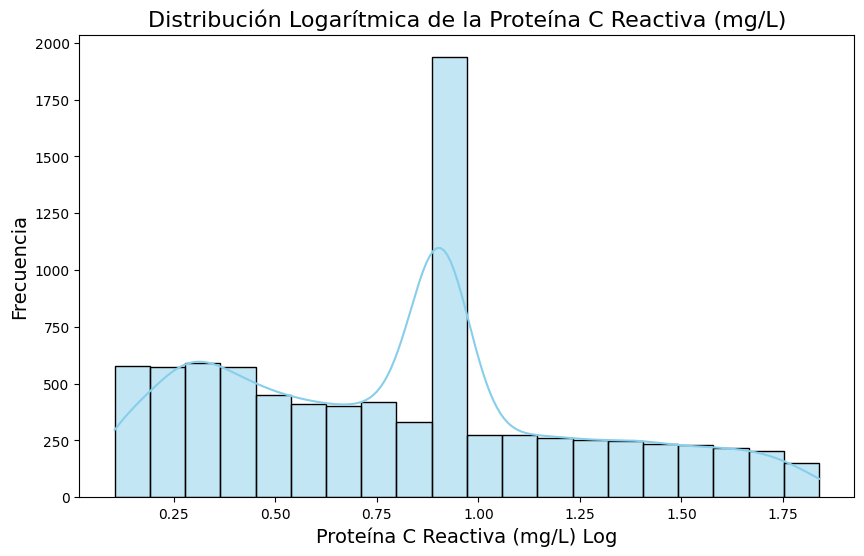

In [68]:
# Aplicar la transformación logarítmica
proteina_c['Proteína C Reactiva (mg/L) Log'] = np.log1p(proteina_c['Proteína C Reactiva (mg/L)'])

# Visualizar la distribución después de la transformación logarítmica
plt.figure(figsize=(10, 6))
sns.histplot(proteina_c['Proteína C Reactiva (mg/L) Log'].dropna(), bins=20, kde=True, color="skyblue")
plt.title('Distribución Logarítmica de la Proteína C Reactiva (mg/L)', fontsize=16)
plt.xlabel('Proteína C Reactiva (mg/L) Log', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=415717;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=46291;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

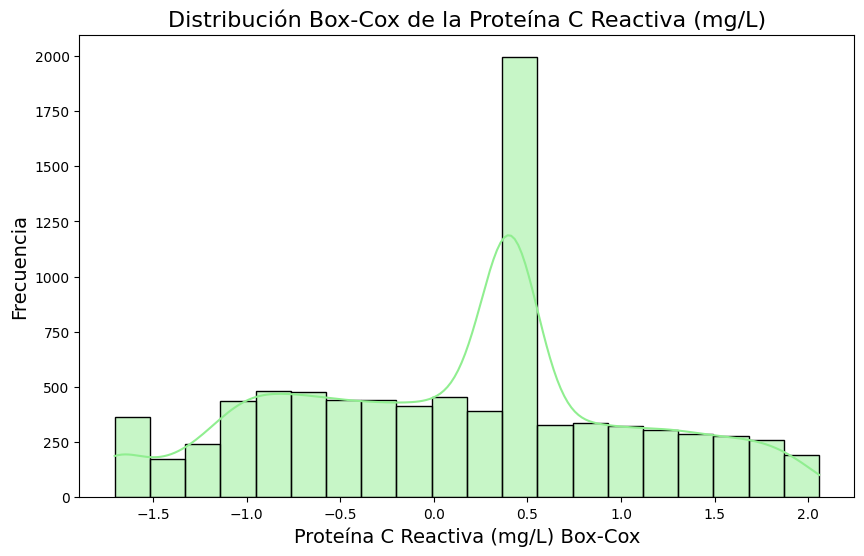

In [69]:
# Aplicar la transformación Box-Cox (requiere valores positivos)
proteina_c_positive = proteina_c[proteina_c['Proteína C Reactiva (mg/L)'] > 0]
proteina_c['Proteína C Reactiva (mg/L) Box-Cox'], _ = stats.boxcox(proteina_c_positive['Proteína C Reactiva (mg/L)'])

# Visualizar la distribución después de la transformación Box-Cox
plt.figure(figsize=(10, 6))
sns.histplot(proteina_c['Proteína C Reactiva (mg/L) Box-Cox'].dropna(), bins=20, kde=True, color="lightgreen")
plt.title('Distribución Box-Cox de la Proteína C Reactiva (mg/L)', fontsize=16)
plt.xlabel('Proteína C Reactiva (mg/L) Box-Cox', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

[09/08/24 15:21:38] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=149618;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=369661;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

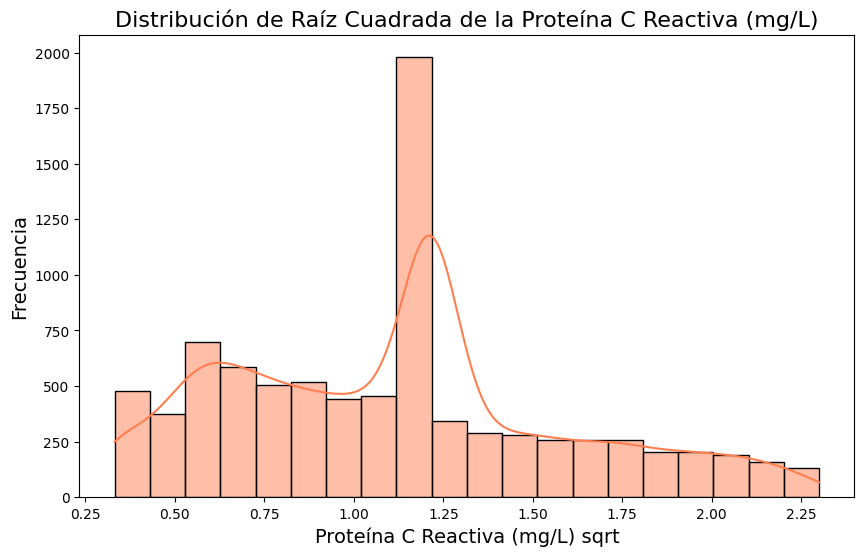

In [70]:
# Aplicar la transformación de raíz cuadrada
proteina_c['Proteína C Reactiva (mg/L) sqrt'] = np.sqrt(proteina_c['Proteína C Reactiva (mg/L)'])

# Visualizar la distribución después de la transformación de raíz cuadrada
plt.figure(figsize=(10, 6))
sns.histplot(proteina_c['Proteína C Reactiva (mg/L) sqrt'].dropna(), bins=20, kde=True, color="coral")
plt.title('Distribución de Raíz Cuadrada de la Proteína C Reactiva (mg/L)', fontsize=16)
plt.xlabel('Proteína C Reactiva (mg/L) sqrt', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=801901;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=522861;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

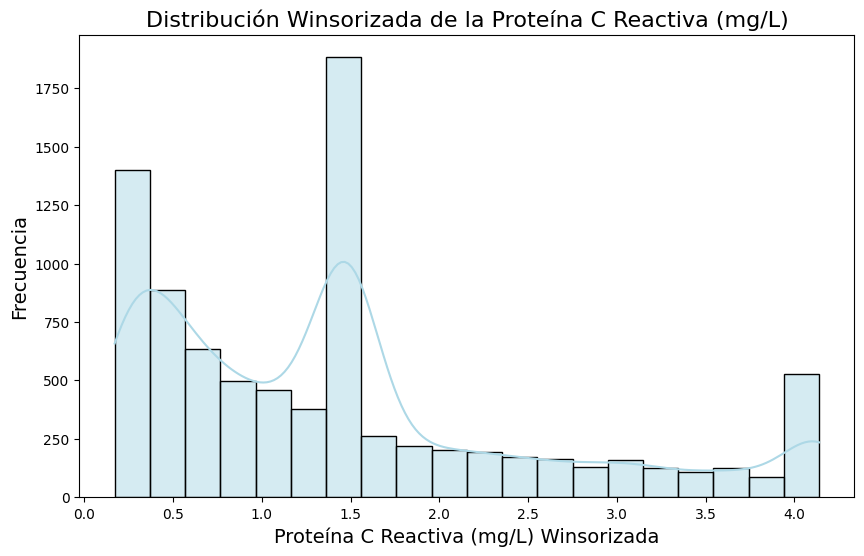

In [71]:
# Aplicar winsorización a los datos (cap los valores en el percentil 95)
proteina_c['Proteína C Reactiva (mg/L) Winsorizada'] = mstats.winsorize(proteina_c['Proteína C Reactiva (mg/L)'], limits=[0.05, 0.05])

# Visualizar la distribución después de la winsorización
plt.figure(figsize=(10, 6))
sns.histplot(proteina_c['Proteína C Reactiva (mg/L) Winsorizada'].dropna(), bins=20, kde=True, color="lightblue")
plt.title('Distribución Winsorizada de la Proteína C Reactiva (mg/L)', fontsize=16)
plt.xlabel('Proteína C Reactiva (mg/L) Winsorizada', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

# Combinación de Dataset con Depresión

In [72]:
depresion = depresion.rename(columns={
    'SEQN': 'ID',
    'DPQ010': 'Poco Interés en Hacer Cosas',
    'DPQ020': 'Sentirse Deprimido o Sin Esperanza',
    'DPQ030': 'Problemas para Dormir',
    'DPQ040': 'Cansancio o Poca Energía',
    'DPQ050': 'Poco Apetito o Comer en Exceso',
    'DPQ060': 'Sentirse Mal Acerca de Uno Mismo',
    'DPQ070': 'Problemas de Concentración',
    'DPQ080': 'Movimientos o Hablar Lento o Rápido',
    'DPQ090': 'Pensamientos de Muerte o Autolesión',
    'DPQ100': 'Dificultad que Estos Problemas Causan'
})

In [73]:
consideracion_depresion = pd.merge(consideracion, depresion, on='ID', how='inner')

In [74]:
consideracion_depresion

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Poco Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
0,109273.00,36.00,1.00,3.00,4.00,3.00,0.91,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00
1,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,109282.00,76.00,1.00,3.00,5.00,1.00,1.90,0.00,1.00,0.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00
3,109286.00,33.00,2.00,6.00,5.00,1.00,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109292.00,58.00,1.00,2.00,3.00,2.00,1.26,0.00,3.00,0.00,2.00,0.00,3.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6313,124810.00,56.00,2.00,4.00,4.00,3.00,1.39,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
6314,124814.00,64.00,1.00,4.00,3.00,2.00,1.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
6315,124817.00,67.00,2.00,1.00,2.00,1.00,1.48,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
6316,124818.00,40.00,1.00,4.00,5.00,1.00,1.95,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [75]:
consideracion_depresion.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Poco Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
count,6318.00,6318.00,6318.00,6318.00,6159.00,6159.00,6318.00,5870.00,5869.00,5869.00,5869.00,5869.00,5868.00,5868.00,5868.00,5866.00,4015.00
mean,117147.90,49.03,1.52,3.44,3.37,1.71,1.34,0.42,0.40,0.70,0.80,0.44,0.28,0.30,0.19,0.06,0.36
std,4479.07,18.73,0.50,1.56,1.17,1.26,0.48,0.81,0.77,1.02,0.98,0.85,0.69,0.75,0.62,0.36,0.66
min,109273.00,18.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,113321.25,33.00,1.00,3.00,3.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,117180.50,50.00,2.00,3.00,4.00,1.00,1.32,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,121072.50,64.00,2.00,4.00,4.00,2.00,1.70,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
max,124821.00,80.00,2.00,7.00,9.00,77.00,2.23,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00


In [76]:
def detectar_outliers_zscore(df, columna, umbral=3):
    z_scores = np.abs(stats.zscore(df[columna].dropna()))
    z_scores_series = pd.Series(z_scores, index=df[columna].dropna().index)
    outliers = df.loc[z_scores_series[z_scores_series > umbral].index]
    return outliers
    
outliers_zscore = detectar_outliers_zscore(depresion, 'Poco Interés en Hacer Cosas')
display(outliers_zscore)

,ID,Poco Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
94,109459.00,3.00,0.00,2.00,3.00,3.00,1.00,1.00,1.00,0.00,0.00
131,109530.00,3.00,1.00,1.00,1.00,2.00,0.00,2.00,0.00,0.00,0.00
145,109551.00,3.00,1.00,1.00,2.00,0.00,3.00,2.00,2.00,0.00,1.00
190,109630.00,3.00,1.00,0.00,3.00,0.00,0.00,0.00,1.00,0.00,0.00
214,109673.00,3.00,3.00,3.00,2.00,2.00,3.00,3.00,3.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
8838,124615.00,3.00,2.00,3.00,3.00,2.00,1.00,3.00,3.00,0.00,3.00
8879,124690.00,3.00,2.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
8901,124726.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,0.00,3.00,2.00
8908,124737.00,3.00,0.00,1.00,2.00,3.00,0.00,1.00,0.00,0.00,1.00


                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=799337;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=397994;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

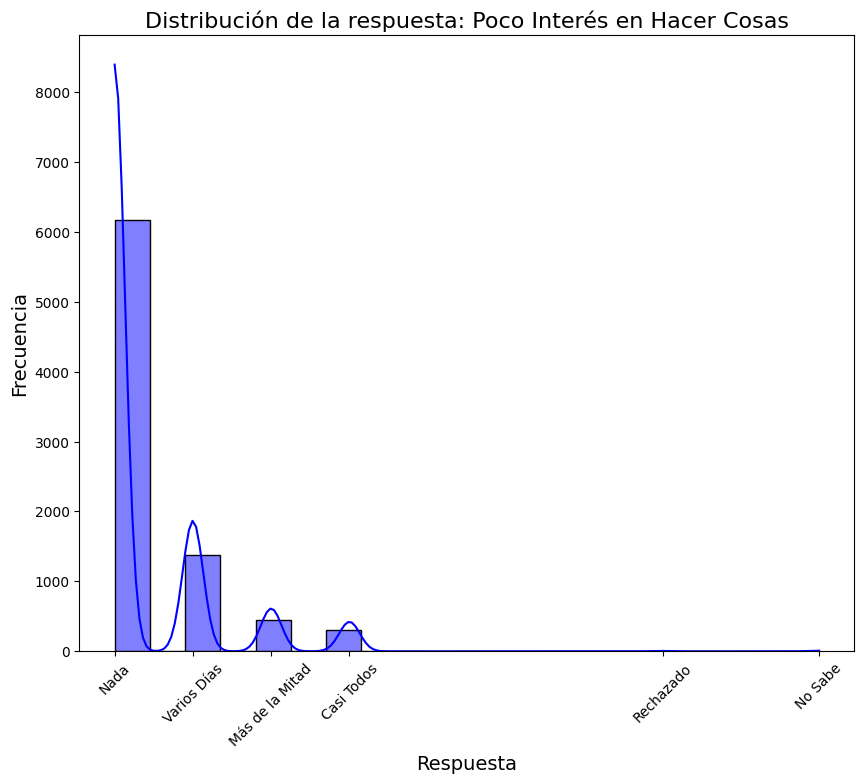

In [77]:
# Histograma de la columna 'Poca Interés en Hacer Cosas'
plt.figure(figsize=(10, 8))
sns.histplot(depresion['Poco Interés en Hacer Cosas'].dropna(), bins=20, kde=True, color="blue")
plt.title('Distribución de la respuesta: Poco Interés en Hacer Cosas', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 7, 9], labels=['Nada', 'Varios Días', 'Más de la Mitad', 'Casi Todos', 'Rechazado', 'No Sabe'])
plt.xticks(rotation=45)  # Rota las etiquetas del eje X 45 grados
plt.show()

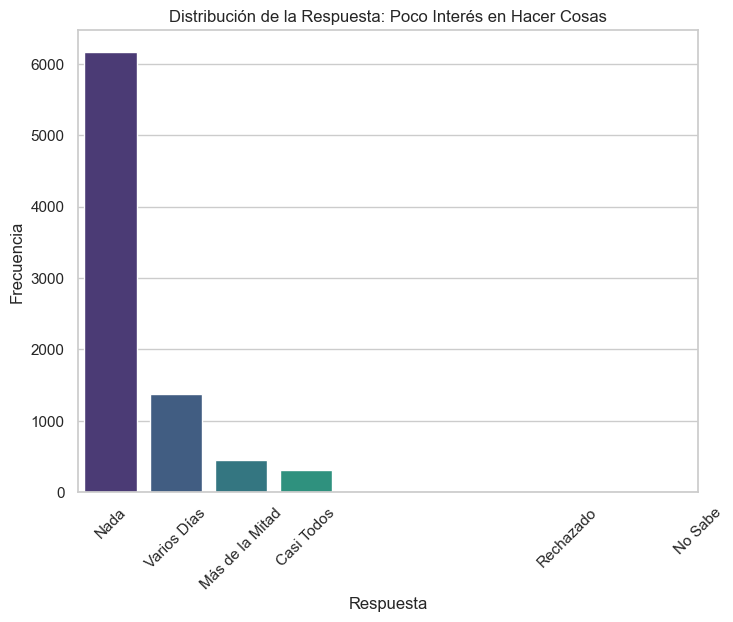

In [78]:
sns.set(style="whitegrid")

# Pregunta 1: Distribución para 'Poca Interés en Hacer Cosas' (DPQ010)
plt.figure(figsize=(8, 6))
sns.countplot(x='Poco Interés en Hacer Cosas', data=depresion, palette="viridis")
plt.title('Distribución de la Respuesta: Poco Interés en Hacer Cosas')
plt.xlabel('Respuesta')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1, 2, 3, 7, 9], labels=['Nada', 'Varios Días', 'Más de la Mitad', 'Casi Todos', 'Rechazado', 'No Sabe'])
plt.xticks(rotation=45)  # Rota las etiquetas del eje X 45 grados
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=626369;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=971406;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

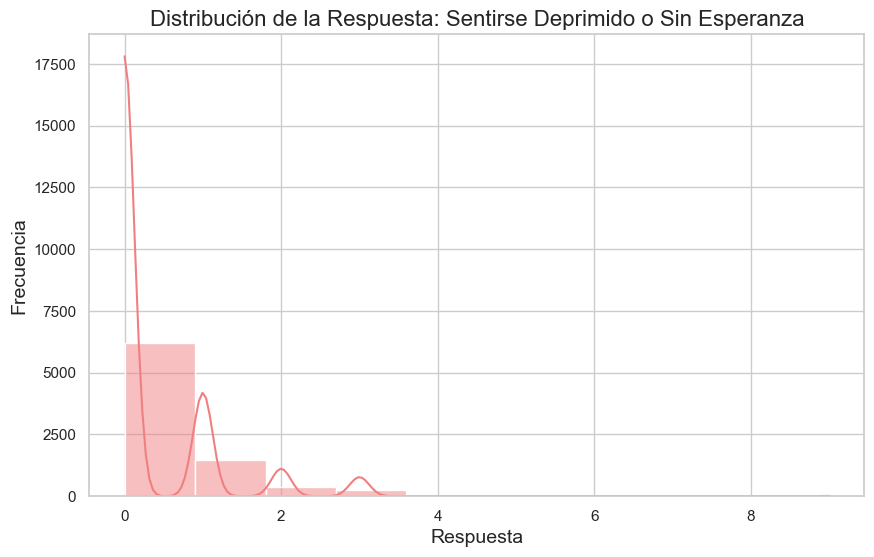

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Sentirse Deprimido o Sin Esperanza'].dropna(), bins=10, kde=True, color="lightcoral")
plt.title('Distribución de la Respuesta: Sentirse Deprimido o Sin Esperanza', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

[09/08/24 15:21:39] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=974226;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=126508;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

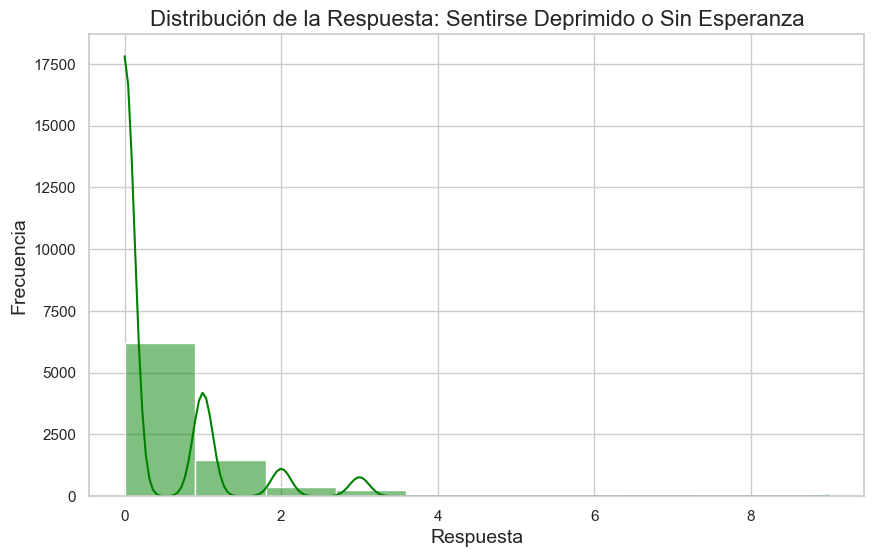

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Sentirse Deprimido o Sin Esperanza'].dropna(), bins=10, kde=True, color="green")
plt.title('Distribución de la Respuesta: Sentirse Deprimido o Sin Esperanza', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=524152;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=50897;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

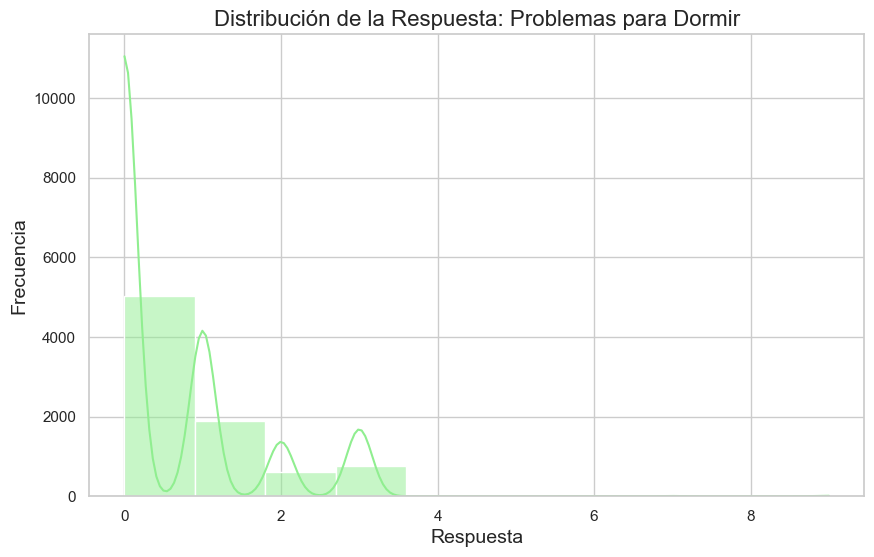

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Problemas para Dormir'].dropna(), bins=10, kde=True, color="lightgreen")
plt.title('Distribución de la Respuesta: Problemas para Dormir', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=888050;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=212605;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

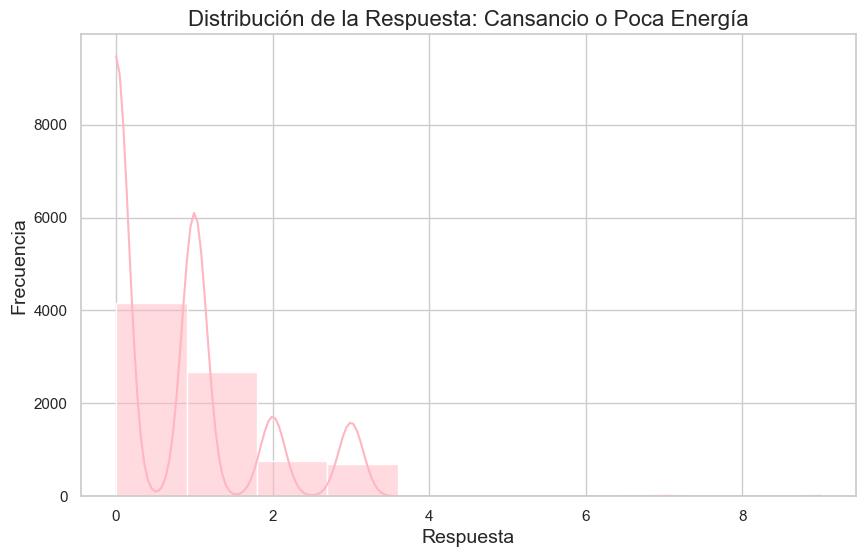

In [82]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Cansancio o Poca Energía'].dropna(), bins=10, kde=True, color="lightpink")
plt.title('Distribución de la Respuesta: Cansancio o Poca Energía', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=349275;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=167758;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

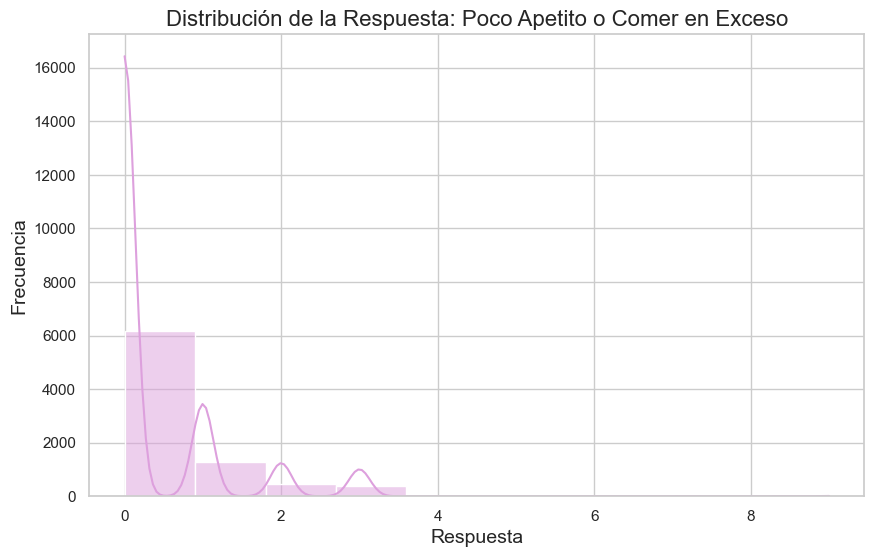

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Poco Apetito o Comer en Exceso'].dropna(), bins=10, kde=True, color="plum")
plt.title('Distribución de la Respuesta: Poco Apetito o Comer en Exceso', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=728990;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=364663;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

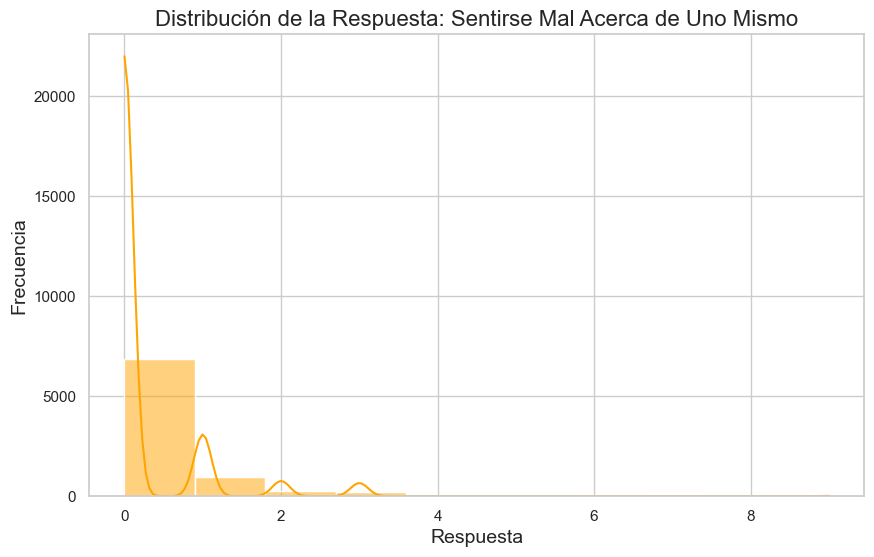

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Sentirse Mal Acerca de Uno Mismo'].dropna(), bins=10, kde=True, color="orange")
plt.title('Distribución de la Respuesta: Sentirse Mal Acerca de Uno Mismo', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

[09/08/24 15:21:40] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=475032;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=268585;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

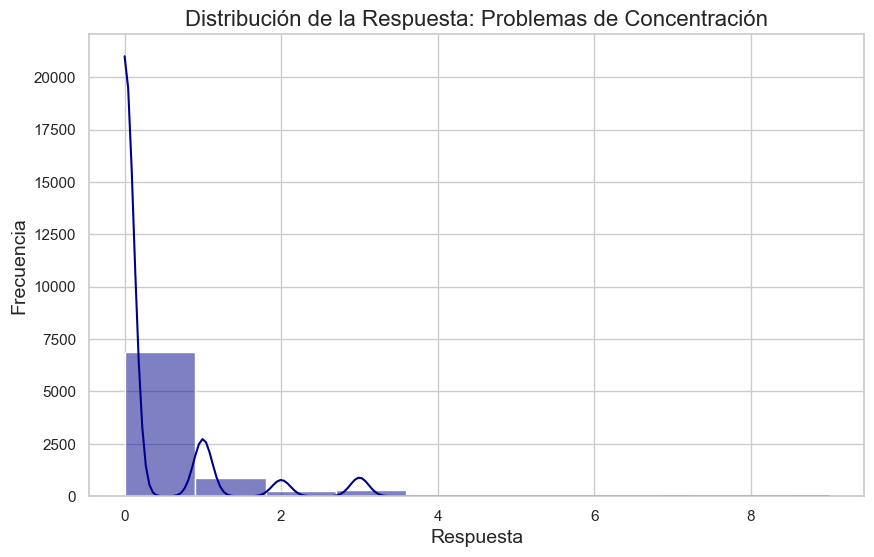

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Problemas de Concentración'].dropna(), bins=10, kde=True, color="darkblue")
plt.title('Distribución de la Respuesta: Problemas de Concentración', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=26362;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=176425;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

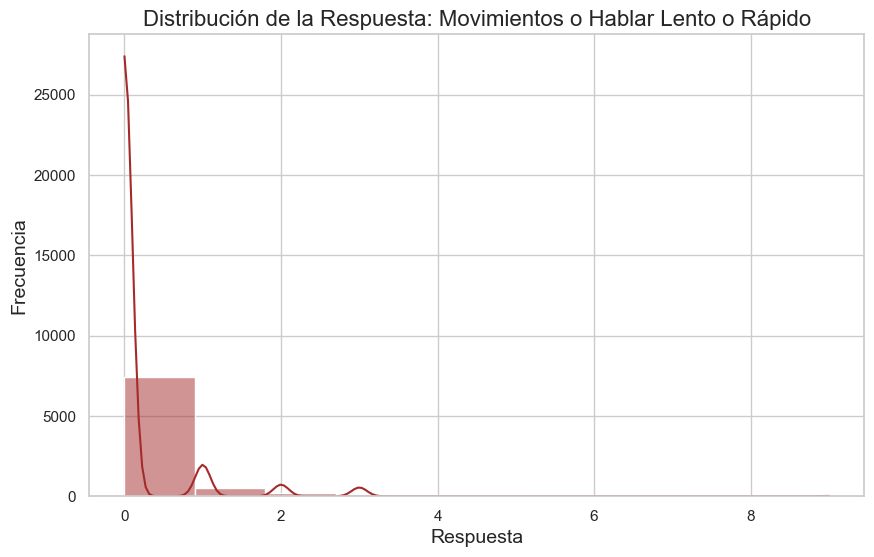

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Movimientos o Hablar Lento o Rápido'].dropna(), bins=10, kde=True, color="brown")
plt.title('Distribución de la Respuesta: Movimientos o Hablar Lento o Rápido', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=624906;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=483785;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

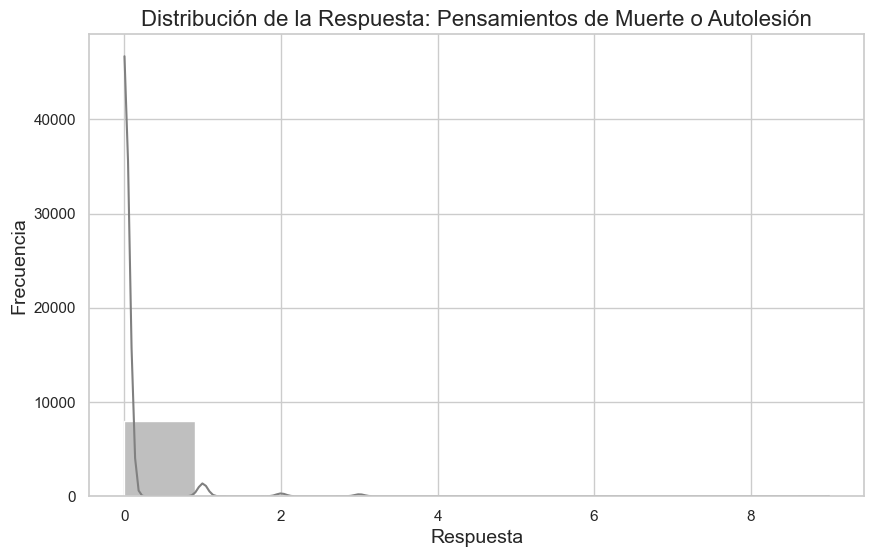

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Pensamientos de Muerte o Autolesión'].dropna(), bins=10, kde=True, color="grey")
plt.title('Distribución de la Respuesta: Pensamientos de Muerte o Autolesión', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

In [88]:
df= pd.merge(consideracion, insulina, on='ID', how='inner')

In [89]:
df.head()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina
0,109264.00,13.00,2.00,1.00,1.00,3.00,0.91,27533.17,6.05,36.30,0.00
1,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,16281.76,13.52,81.12,0.00
2,109277.00,12.00,2.00,1.00,1.00,3.00,1.16,32230.05,6.44,38.64,0.00
3,109282.00,76.00,1.00,3.00,5.00,1.00,1.90,79007.10,7.49,44.94,0.00
4,109286.00,33.00,2.00,6.00,5.00,1.00,1.17,0.00,16.46,98.76,0.00


In [90]:
df.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina
count,3650.00,3650.00,3650.00,3650.00,3582.00,3582.00,3650.00,3650.00,3307.00,3307.00,3307.00
mean,117187.07,43.93,1.52,3.45,3.12,1.87,1.33,48912.22,15.45,92.69,0.00
std,4467.37,20.82,0.50,1.62,1.25,0.88,0.48,60974.78,23.11,138.67,0.05
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,0.00
25%,113370.75,25.00,1.00,3.00,2.00,1.00,1.00,16798.02,6.49,38.94,0.00
50%,117331.50,44.00,2.00,3.00,3.00,2.00,1.31,31798.15,10.38,62.28,0.00
75%,121059.25,62.00,2.00,4.00,4.00,3.00,1.68,57227.95,17.15,102.90,0.00
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,741259.19,485.10,2910.60,1.00


In [91]:
df2= pd.merge(df, colesterol, on='ID', how='inner')

In [92]:
df2.head()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina,Colesterol Total (mg/dL),Colesterol Total (mmol/L)
0,109264.00,13.00,2.00,1.00,1.00,3.00,0.91,27533.17,6.05,36.30,0.00,166.00,4.29
1,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,16281.76,13.52,81.12,0.00,105.00,2.72
2,109277.00,12.00,2.00,1.00,1.00,3.00,1.16,32230.05,6.44,38.64,0.00,129.00,3.34
3,109282.00,76.00,1.00,3.00,5.00,1.00,1.90,79007.10,7.49,44.94,0.00,233.00,6.03
4,109286.00,33.00,2.00,6.00,5.00,1.00,1.17,0.00,16.46,98.76,0.00,236.00,6.10


In [93]:
df2.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina,Colesterol Total (mg/dL),Colesterol Total (mmol/L)
count,3650.00,3650.00,3650.00,3650.00,3582.00,3582.00,3650.00,3650.00,3307.00,3307.00,3307.00,3336.00,3336.00
mean,117187.07,43.93,1.52,3.45,3.12,1.87,1.33,48912.22,15.45,92.69,0.00,178.22,4.61
std,4467.37,20.82,0.50,1.62,1.25,0.88,0.48,60974.78,23.11,138.67,0.05,40.87,1.06
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,0.00,73.00,1.89
25%,113370.75,25.00,1.00,3.00,2.00,1.00,1.00,16798.02,6.49,38.94,0.00,150.00,3.88
50%,117331.50,44.00,2.00,3.00,3.00,2.00,1.31,31798.15,10.38,62.28,0.00,173.00,4.47
75%,121059.25,62.00,2.00,4.00,4.00,3.00,1.68,57227.95,17.15,102.90,0.00,202.00,5.22
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,741259.19,485.10,2910.60,1.00,446.00,11.53


In [94]:
df3= pd.merge(df2, proteinaC, on='ID', how='inner')

In [95]:
df3

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina,Colesterol Total (mg/dL),Colesterol Total (mmol/L),Proteína C Reactiva (mg/L),Código de Comentario de Proteína C Reactiva
0,109264.00,13.00,2.00,1.00,1.00,3.00,0.91,27533.17,6.05,36.30,0.00,166.00,4.29,0.11,1.00
1,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,16281.76,13.52,81.12,0.00,105.00,2.72,1.60,0.00
2,109277.00,12.00,2.00,1.00,1.00,3.00,1.16,32230.05,6.44,38.64,0.00,129.00,3.34,2.46,0.00
3,109282.00,76.00,1.00,3.00,5.00,1.00,1.90,79007.10,7.49,44.94,0.00,233.00,6.03,3.11,0.00
4,109286.00,33.00,2.00,6.00,5.00,1.00,1.17,0.00,16.46,98.76,0.00,236.00,6.10,3.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,124799.00,80.00,2.00,3.00,3.00,2.00,1.29,67466.96,4.33,25.98,0.00,183.00,4.73,1.80,0.00
3646,124803.00,46.00,2.00,1.00,4.00,2.00,1.17,51646.77,16.97,101.82,0.00,159.00,4.11,1.23,0.00
3647,124810.00,56.00,2.00,4.00,4.00,3.00,1.39,15125.62,20.12,120.72,0.00,211.00,5.46,8.60,0.00
3648,124814.00,64.00,1.00,4.00,3.00,2.00,1.41,9339.90,7.27,43.62,0.00,225.00,5.82,9.00,0.00


In [96]:
df3.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina,Colesterol Total (mg/dL),Colesterol Total (mmol/L),Proteína C Reactiva (mg/L),Código de Comentario de Proteína C Reactiva
count,3650.00,3650.00,3650.00,3650.00,3582.00,3582.00,3650.00,3650.00,3307.00,3307.00,3307.00,3336.00,3336.00,3311.00,3311.00
mean,117187.07,43.93,1.52,3.45,3.12,1.87,1.33,48912.22,15.45,92.69,0.00,178.22,4.61,3.96,0.02
std,4467.37,20.82,0.50,1.62,1.25,0.88,0.48,60974.78,23.11,138.67,0.05,40.87,1.06,7.17,0.13
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,0.00,73.00,1.89,0.11,0.00
25%,113370.75,25.00,1.00,3.00,2.00,1.00,1.00,16798.02,6.49,38.94,0.00,150.00,3.88,0.75,0.00
50%,117331.50,44.00,2.00,3.00,3.00,2.00,1.31,31798.15,10.38,62.28,0.00,173.00,4.47,1.84,0.00
75%,121059.25,62.00,2.00,4.00,4.00,3.00,1.68,57227.95,17.15,102.90,0.00,202.00,5.22,4.29,0.00
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,741259.19,485.10,2910.60,1.00,446.00,11.53,109.81,1.00


In [97]:
df4 = pd.merge(df3, depresion, on='ID', how='inner')

In [98]:
df4.head()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),...,Poco Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
0,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,16281.76,13.52,81.12,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1,109282.00,76.00,1.00,3.00,5.00,1.00,1.90,79007.10,7.49,44.94,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00
2,109286.00,33.00,2.00,6.00,5.00,1.00,1.17,0.00,16.46,98.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109292.00,58.00,1.00,2.00,3.00,2.00,1.26,0.00,21.40,128.40,...,0.00,3.00,0.00,2.00,0.00,3.00,0.00,0.00,0.00,0.00
4,109307.00,47.00,1.00,6.00,1.00,1.00,1.17,43092.07,8.23,49.38,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


In [99]:
df4.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),...,Poco Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
count,3136.00,3136.00,3136.00,3136.00,3068.00,3068.00,3136.00,3136.00,2875.00,2875.00,...,2923.00,2922.00,2922.00,2922.00,2922.00,2922.00,2922.00,2922.00,2921.00,2042.00
mean,117189.45,48.76,1.53,3.45,3.36,1.68,1.34,50593.51,15.46,92.79,...,0.42,0.41,0.71,0.81,0.45,0.28,0.30,0.19,0.07,0.33
std,4495.17,18.39,0.50,1.60,1.17,0.81,0.48,63042.04,24.34,146.02,...,0.80,0.78,1.02,0.95,0.86,0.70,0.73,0.61,0.37,0.64
min,109274.00,18.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,113363.75,33.00,1.00,3.00,3.00,1.00,1.01,17293.98,6.31,37.89,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,117307.50,49.00,2.00,3.00,4.00,1.00,1.33,32270.87,10.23,61.38,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,121105.75,63.00,2.00,4.00,4.00,2.00,1.70,58887.91,17.08,102.48,...,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,741259.19,485.10,2910.60,...,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00


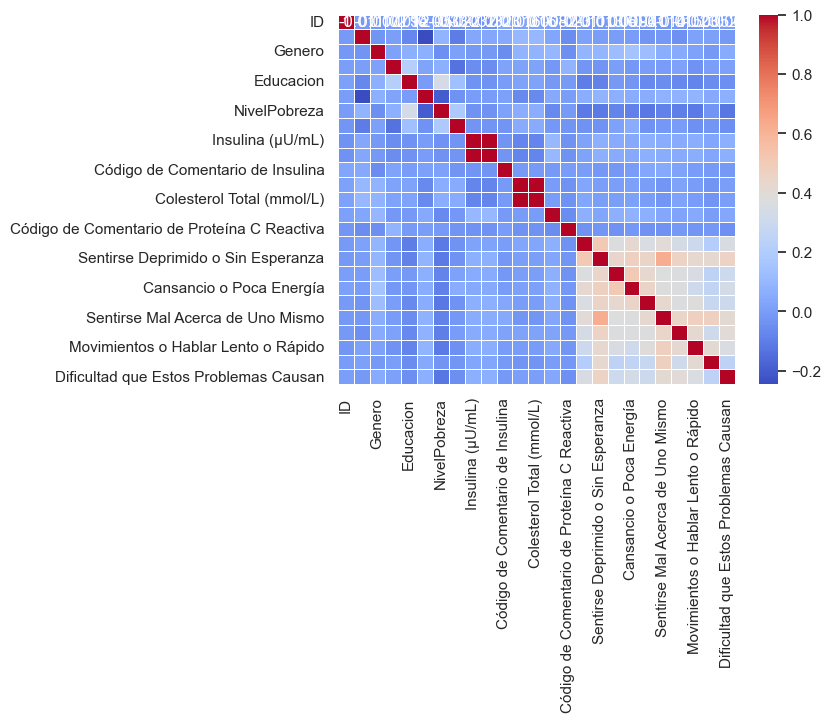

In [100]:
from sklearn.preprocessing import StandardScaler

# Estandarizar las variables
scaler = StandardScaler()
df4_scaled = pd.DataFrame(scaler.fit_transform(df4), columns=df4.columns)

# Recalcular la matriz de correlación
correlation_matrix = df4_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()



In [101]:
perfilB.head()

,SEQN,LBXSATSI,LBDSATLC,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSC3SI,LBXSBU,LBDSBUSI,...,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI
0,109264.00,8.00,0.00,4.30,43.00,172.00,18.00,26.00,9.00,3.21,...,9.40,2.35,170.00,4.40,6.90,69.00,54.00,0.61,3.50,208.20
1,109266.00,15.00,0.00,3.80,38.00,74.00,14.00,25.00,8.00,2.86,...,8.80,2.20,199.00,5.15,6.80,68.00,86.00,0.97,4.90,291.50
2,109271.00,8.00,0.00,3.80,38.00,88.00,14.00,30.00,8.00,2.86,...,8.90,2.23,148.00,3.83,7.30,73.00,101.00,1.14,5.00,297.40
3,109273.00,35.00,0.00,4.60,46.00,70.00,27.00,27.00,11.00,3.93,...,9.70,2.42,168.00,4.34,7.40,74.00,178.00,2.01,5.20,309.30
4,109274.00,19.00,0.00,4.00,40.00,49.00,20.00,28.00,11.00,3.93,...,9.10,2.27,105.00,2.71,6.80,68.00,151.00,1.71,5.10,303.30


In [102]:
perfilB.describe()

,SEQN,LBXSATSI,LBDSATLC,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSC3SI,LBXSBU,LBDSBUSI,...,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI
count,10409.00,9473.00,9473.00,9477.00,9477.00,9474.00,9435.00,9473.00,9473.00,9473.00,...,9473.00,9473.00,9475.00,9475.00,9473.00,9473.00,9473.00,9473.00,9473.00,9473.00
mean,117094.51,21.27,0.00,4.08,40.84,89.26,21.58,25.36,14.48,5.17,...,9.31,2.33,180.75,4.67,7.17,71.70,131.47,1.48,5.34,317.82
std,4500.41,18.26,0.01,0.35,3.53,51.38,13.97,2.41,5.89,2.10,...,0.38,0.09,41.07,1.06,0.45,4.47,101.57,1.15,1.46,86.83
min,109264.00,2.00,0.00,2.10,21.00,16.00,6.00,14.00,2.00,0.71,...,6.40,1.60,72.00,1.86,4.40,44.00,25.00,0.28,0.80,47.60
25%,113190.00,12.00,0.00,3.90,39.00,63.00,16.00,24.00,11.00,3.93,...,9.10,2.27,151.00,3.90,6.90,69.00,74.00,0.83,4.30,255.80
50%,117114.00,17.00,0.00,4.10,41.00,77.00,19.00,25.00,14.00,5.00,...,9.30,2.33,177.00,4.58,7.20,72.00,106.00,1.20,5.20,309.30
75%,120999.00,24.00,0.00,4.30,43.00,96.00,23.00,27.00,17.00,6.07,...,9.50,2.38,205.00,5.30,7.50,75.00,157.00,1.77,6.20,368.80
max,124822.00,682.00,1.00,5.40,54.00,638.00,489.00,38.00,79.00,28.20,...,12.30,3.08,438.00,11.33,10.00,100.00,2923.00,33.00,15.10,898.10


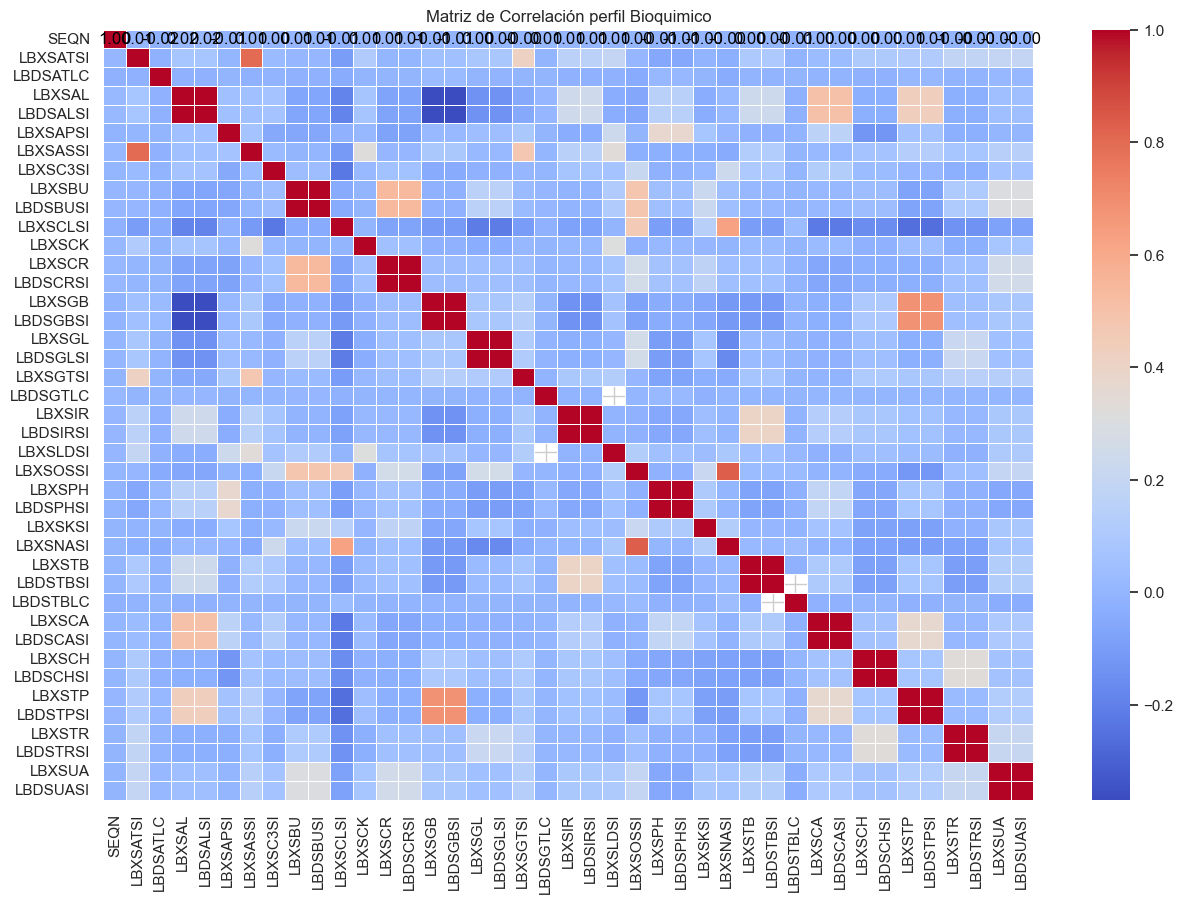

          SEQN  LBXSATSI  LBDSATLC  LBXSAL  LBDSALSI  LBXSAPSI  LBXSASSI  \
SEQN      1.00      0.01     -0.02    0.02      0.02     -0.01      0.01   
LBXSATSI  0.01      1.00     -0.02    0.08      0.08      0.00      0.80   
LBDSATLC -0.02     -0.02      1.00   -0.01     -0.01     -0.00     -0.01   
LBXSAL    0.02      0.08     -0.01    1.00      1.00      0.05      0.05   
LBDSALSI  0.02      0.08     -0.01    1.00      1.00      0.05      0.05   
LBXSAPSI -0.01      0.00     -0.00    0.05      0.05      1.00      0.07   
LBXSASSI  0.01      0.80     -0.01    0.05      0.05      0.07      1.00   
LBXSC3SI  0.00      0.03     -0.01    0.07      0.07     -0.05      0.03   
LBXSBU    0.01      0.01     -0.01   -0.07     -0.07     -0.06      0.00   
LBDSBUSI  0.01      0.01     -0.01   -0.07     -0.07     -0.06      0.00   
LBXSCLSI -0.01     -0.10     -0.04   -0.19     -0.19     -0.02     -0.11   
LBXSCK    0.01      0.12     -0.00    0.07      0.07      0.01      0.32   
LBXSCR    0.

In [103]:
df_combined_numeric = perfilB.select_dtypes(include=[np.number])
correlation_matrix = correlation_matrix.fillna(0)

# Recalcula la matriz de correlación
correlation_matrix = perfilB.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"color": "black"})
plt.title('Matriz de Correlación perfil Bioquimico')
plt.show()
print(correlation_matrix)

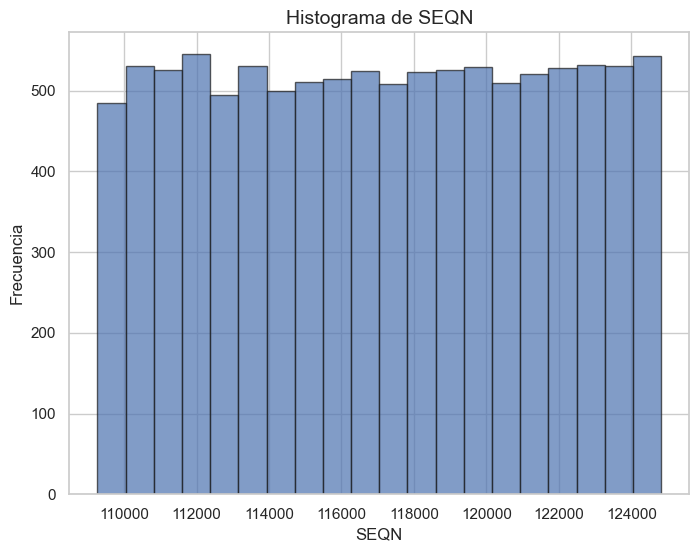

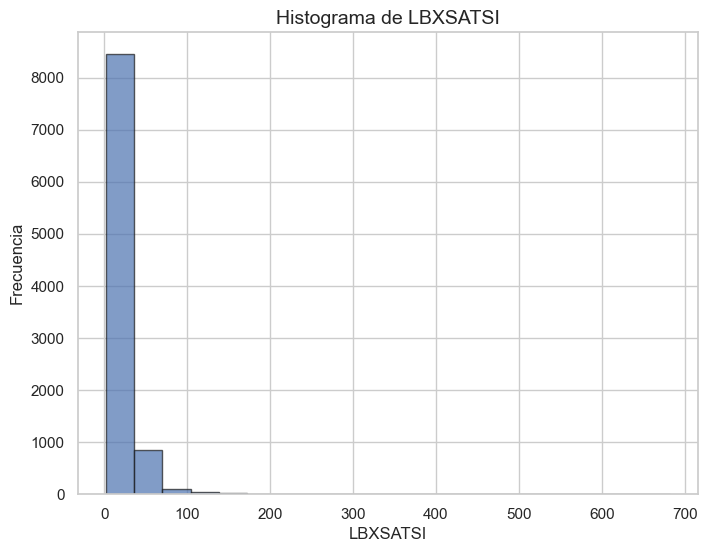

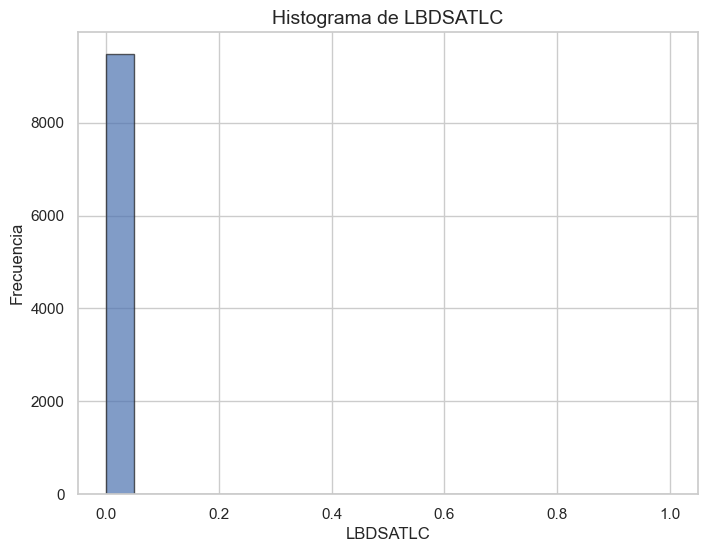

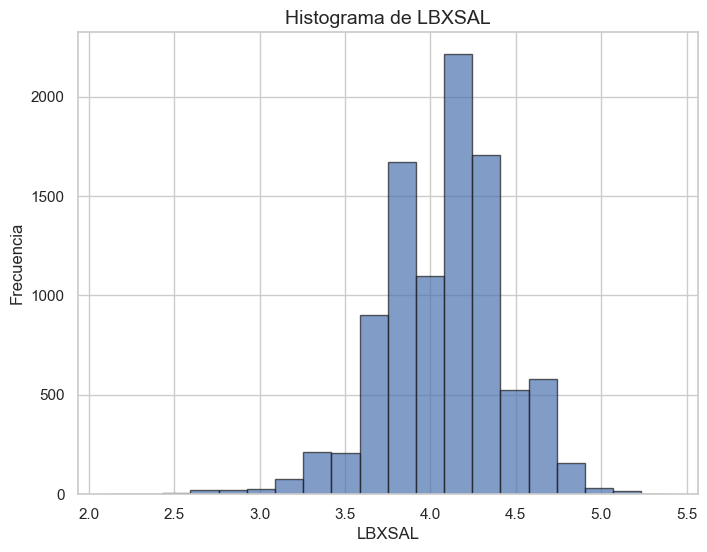

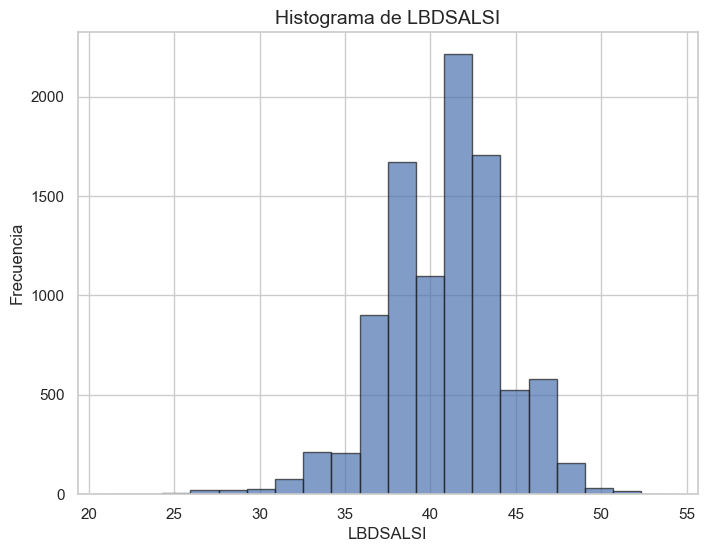

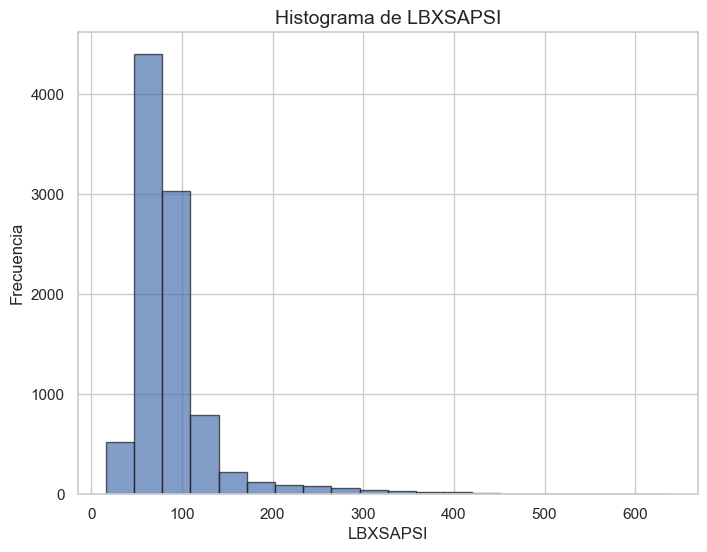

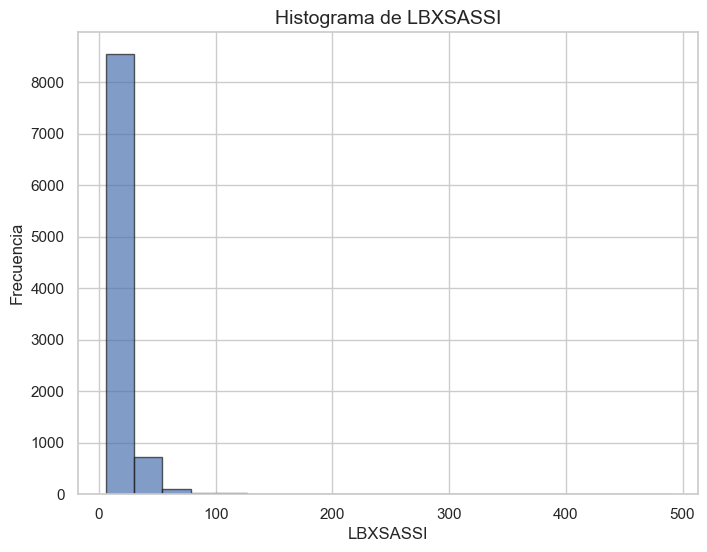

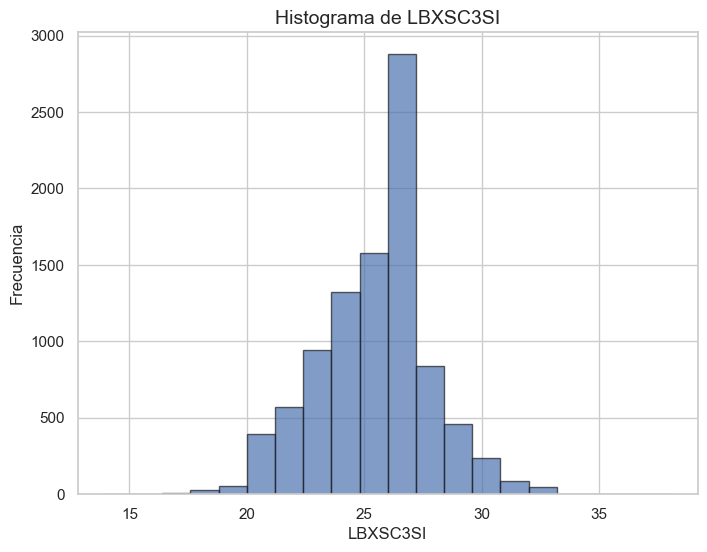

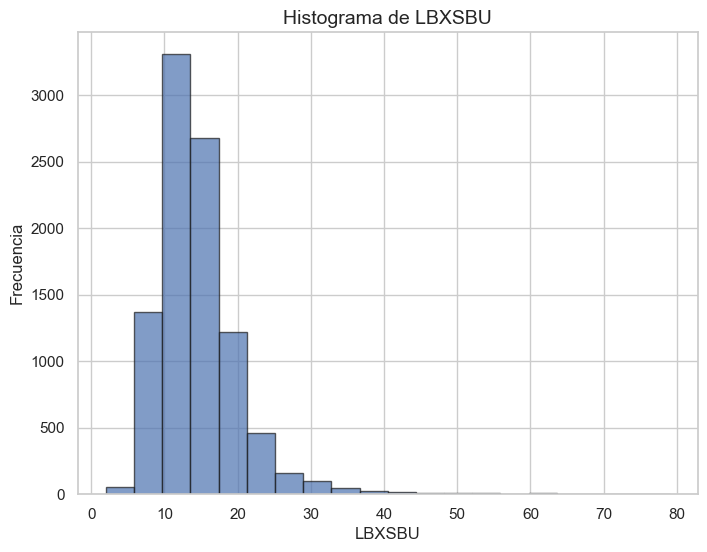

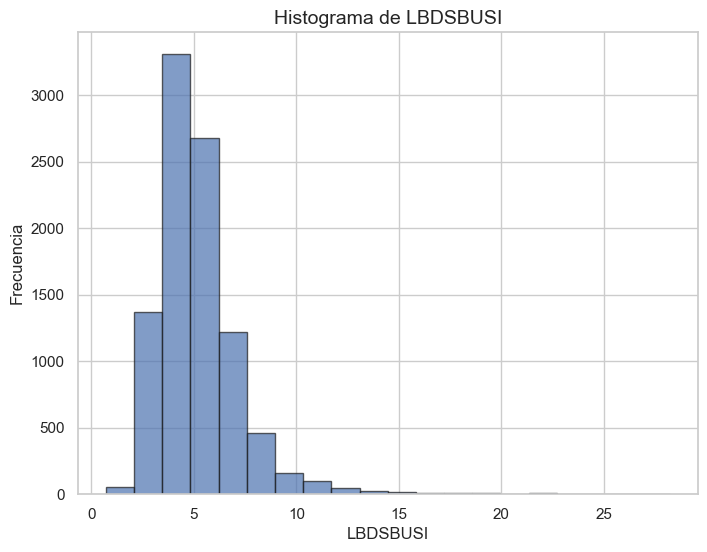

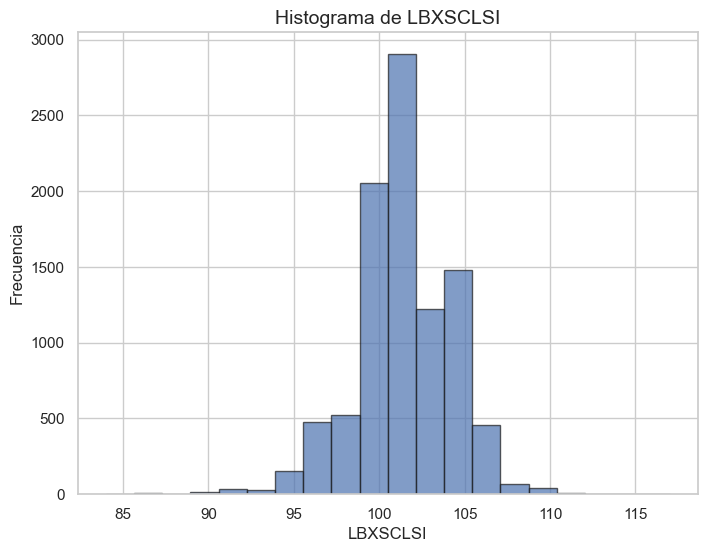

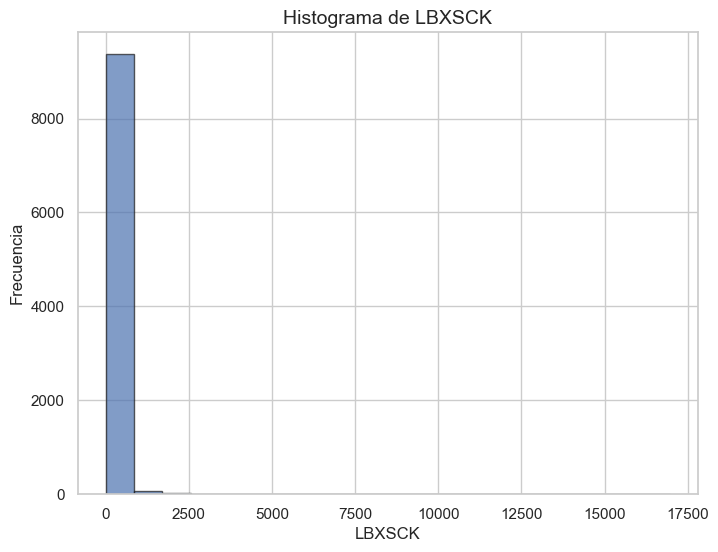

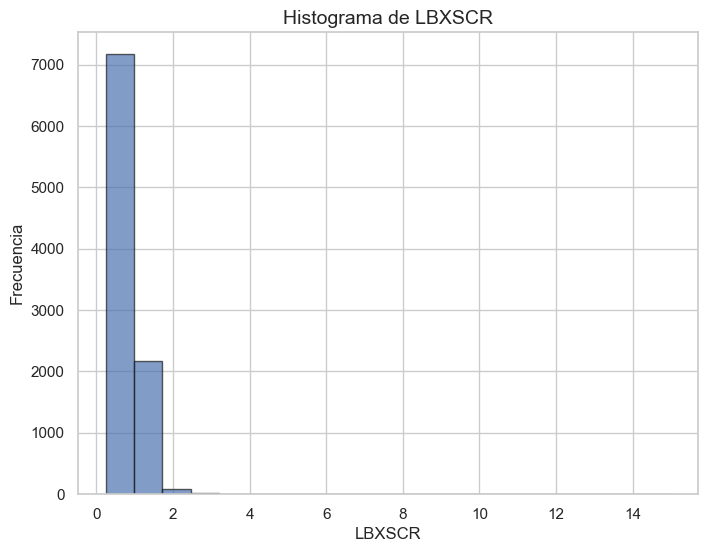

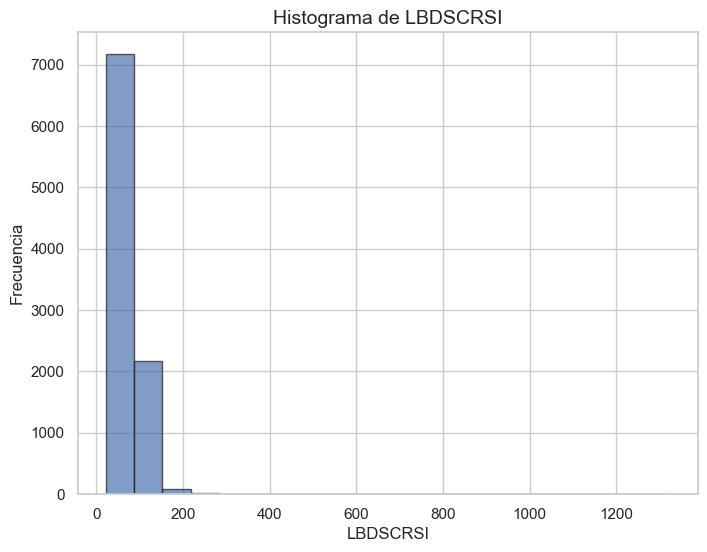

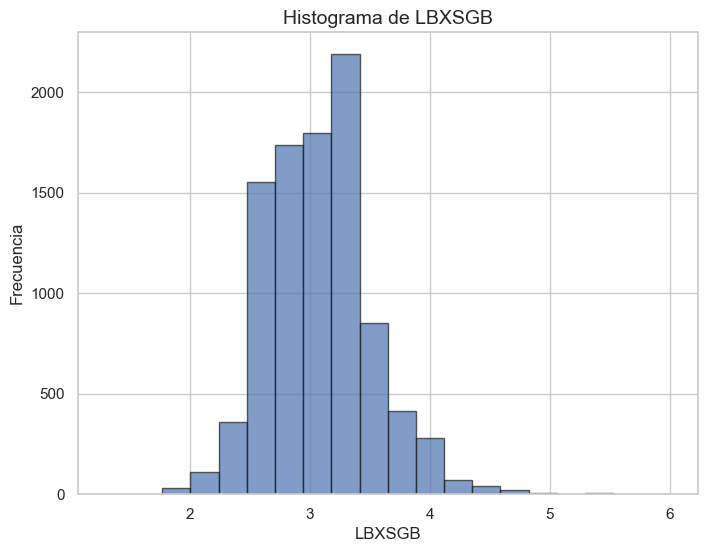

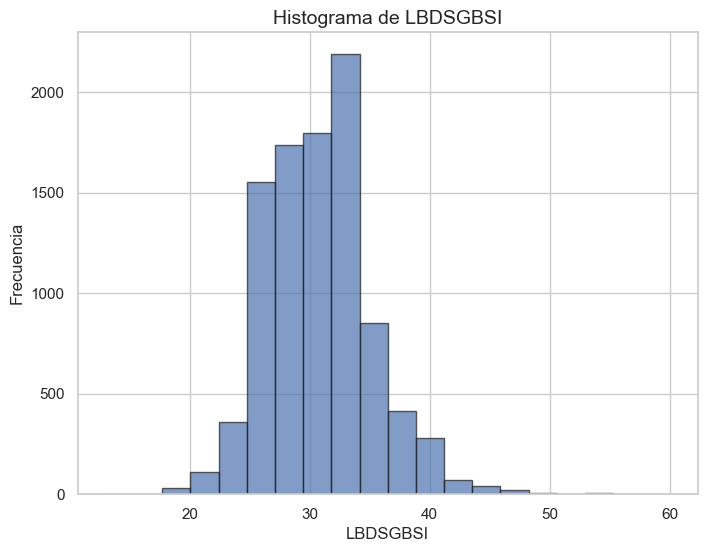

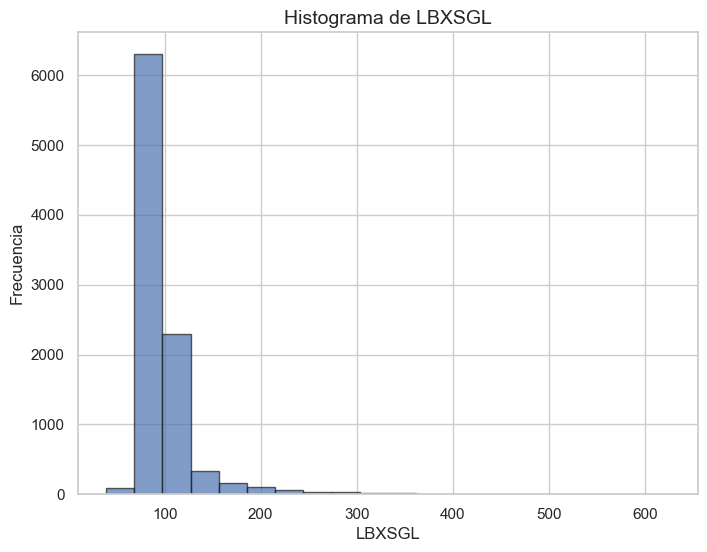

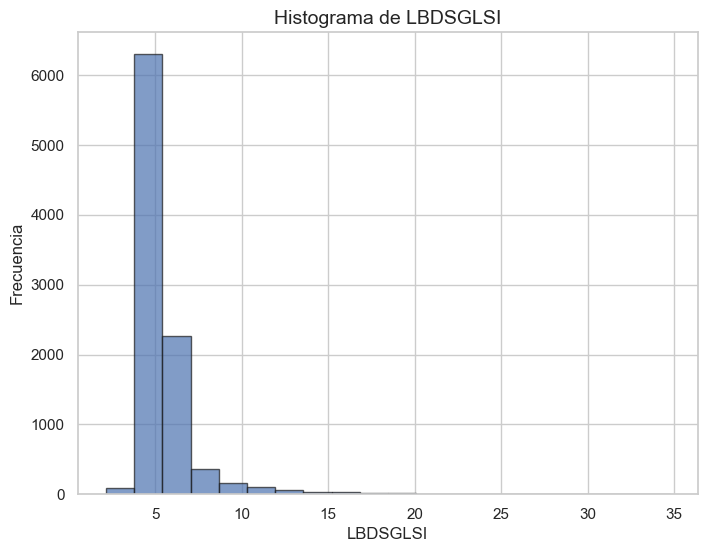

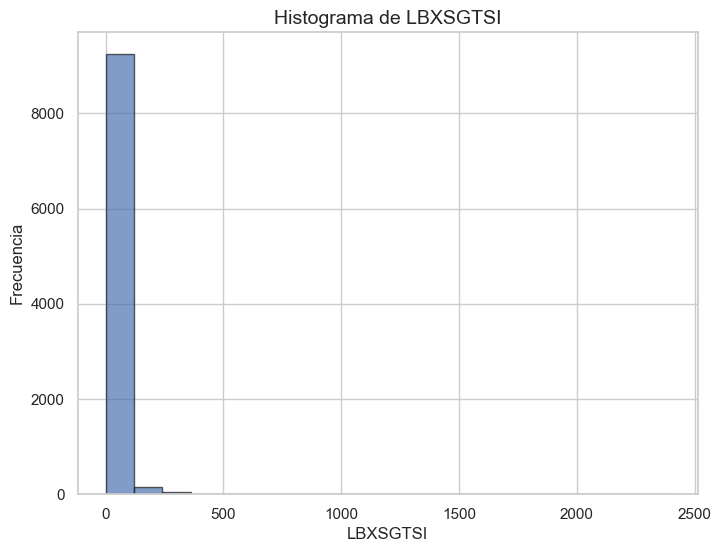

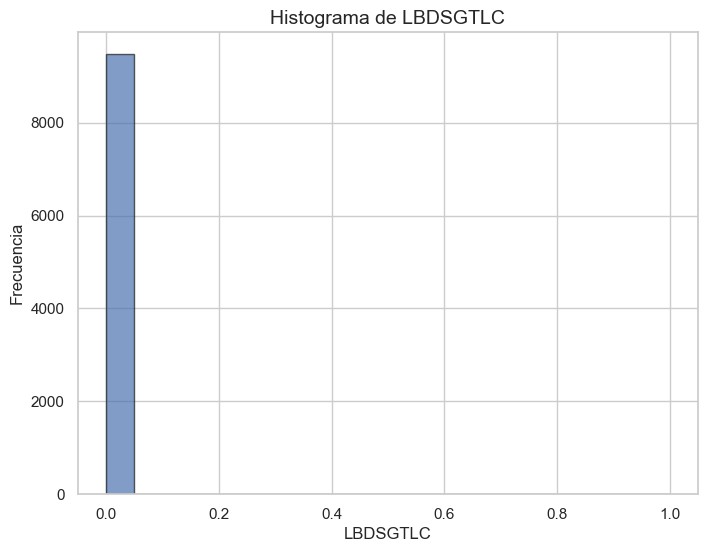

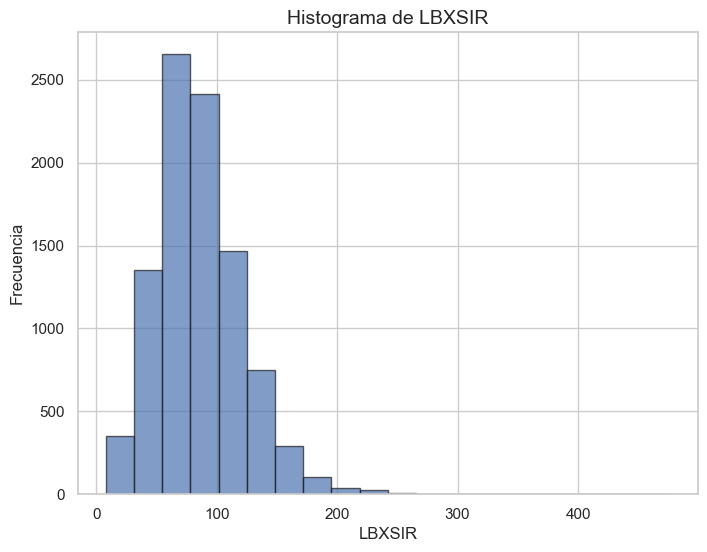

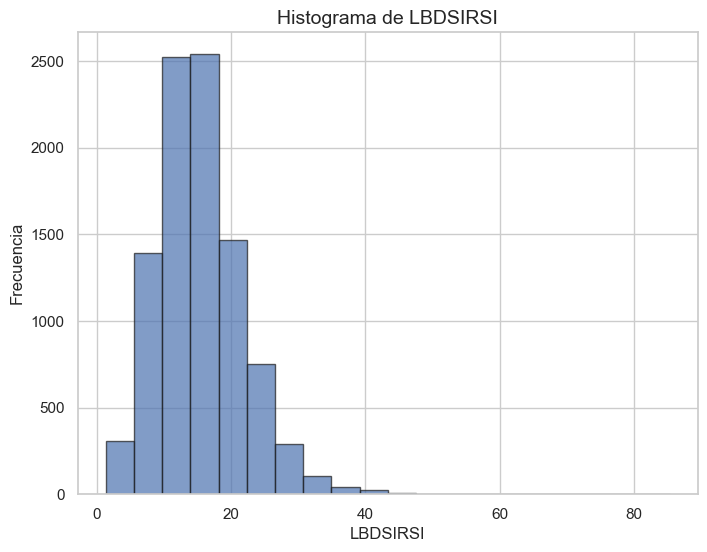

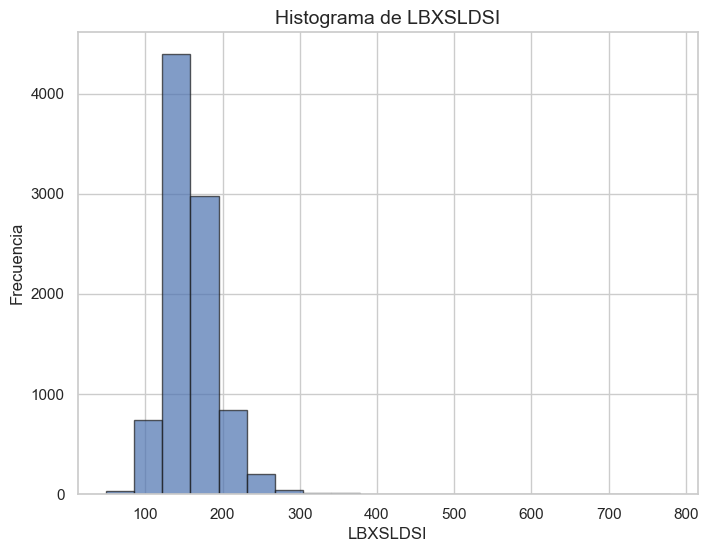

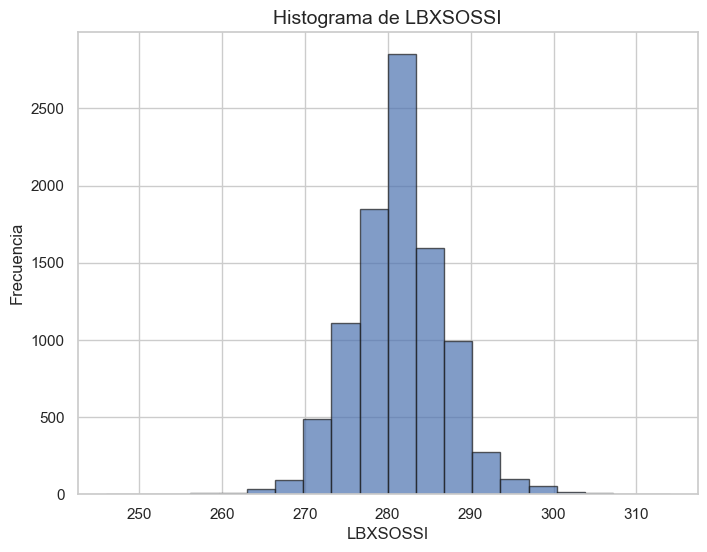

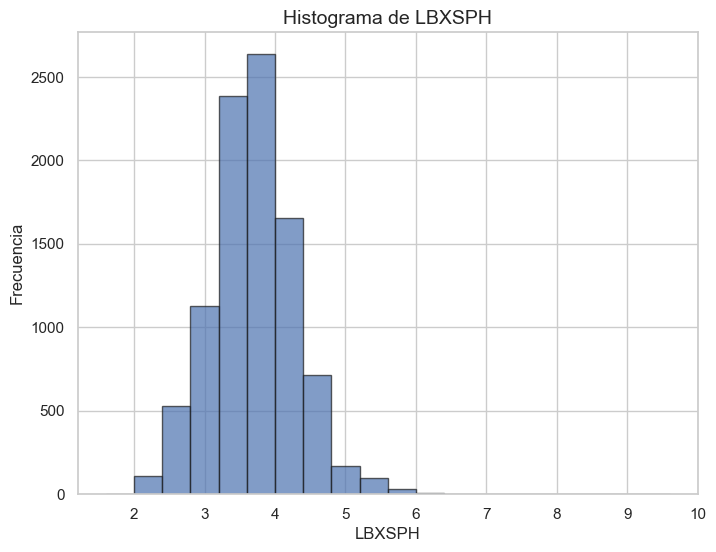

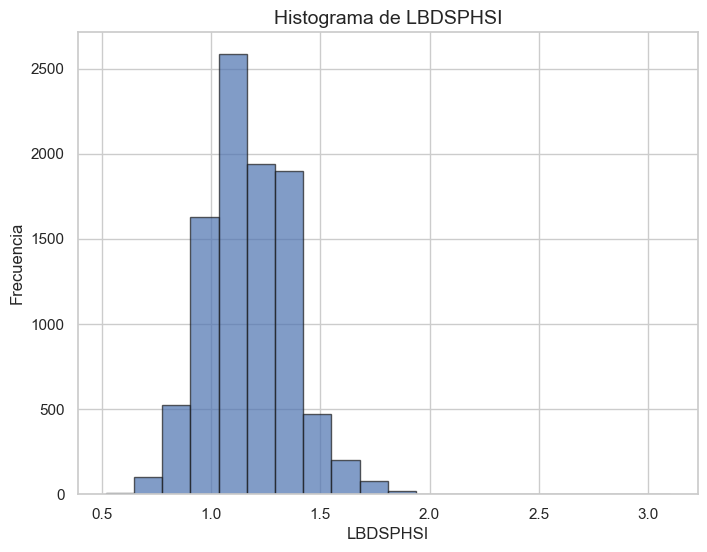

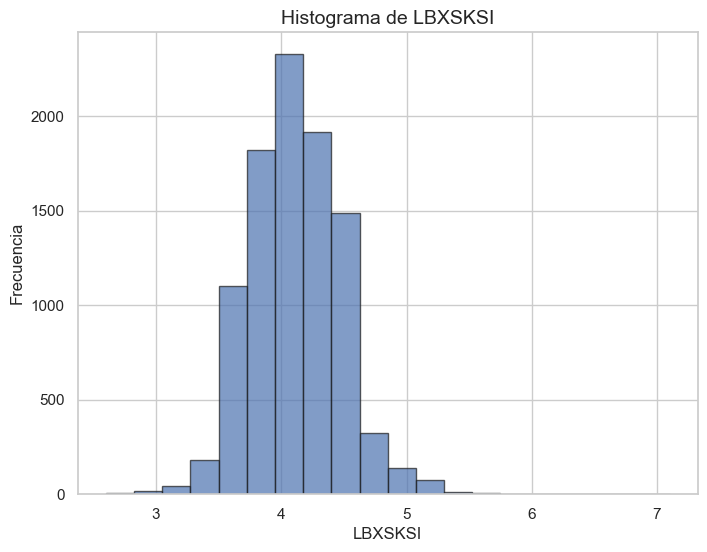

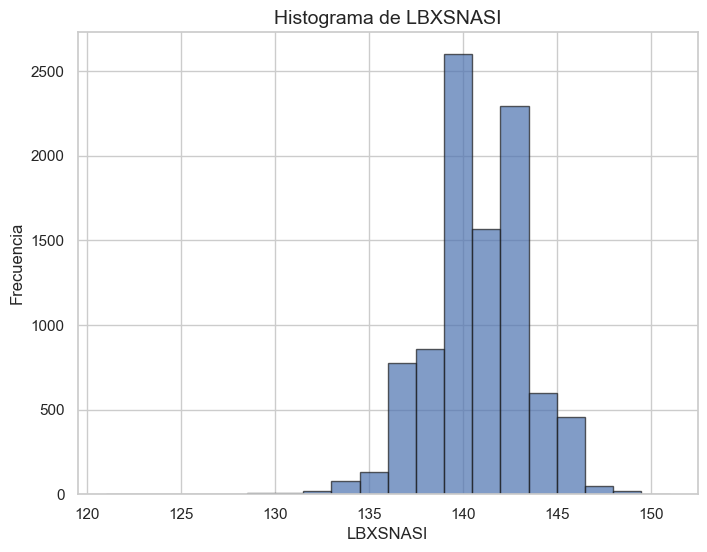

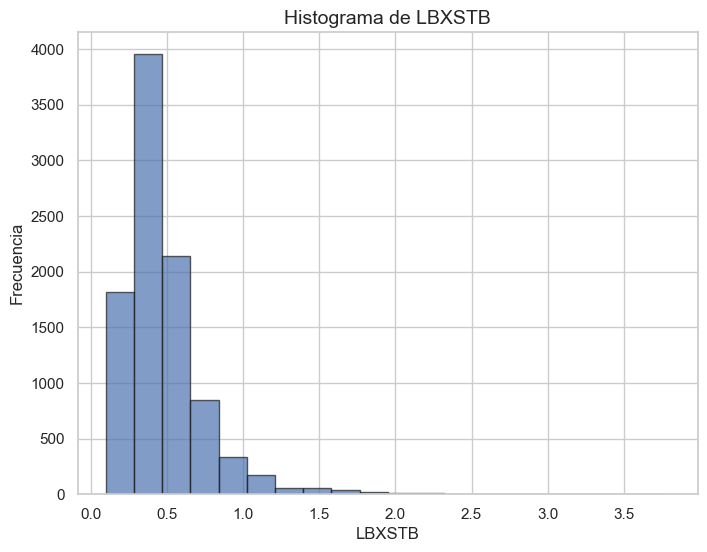

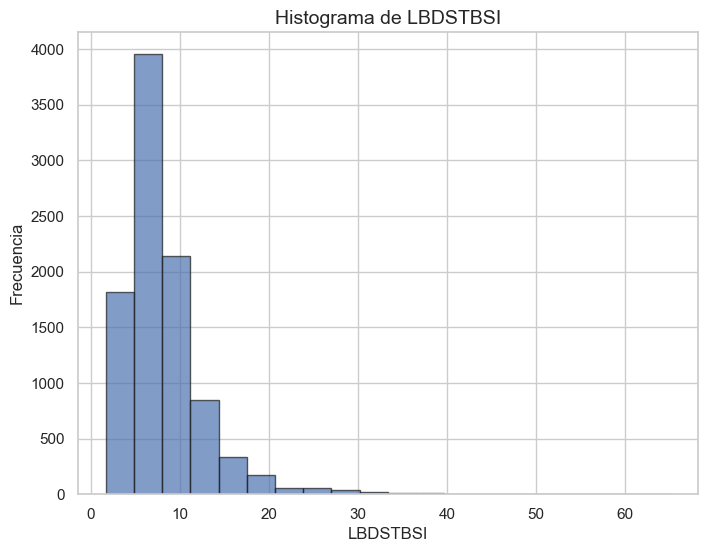

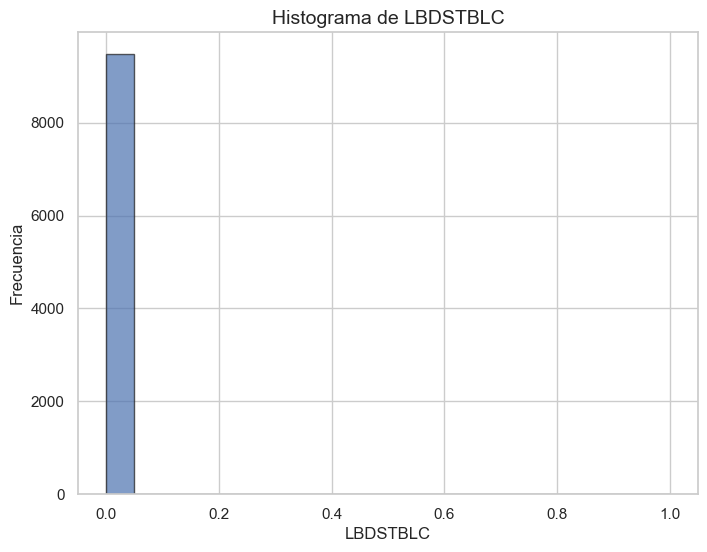

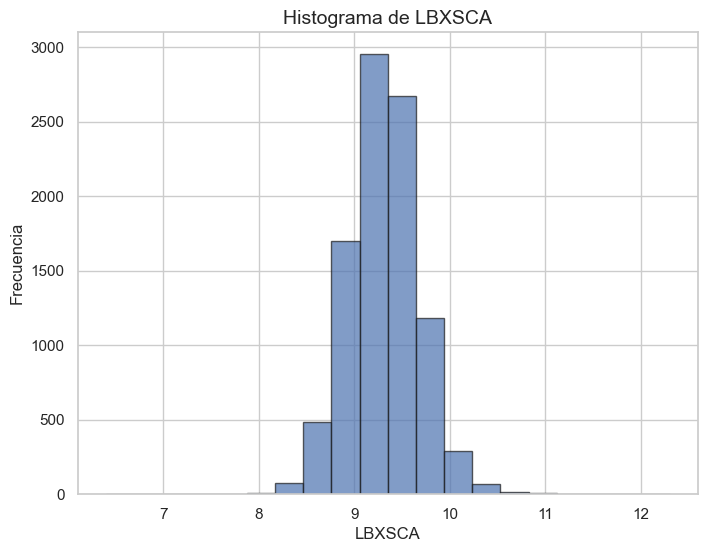

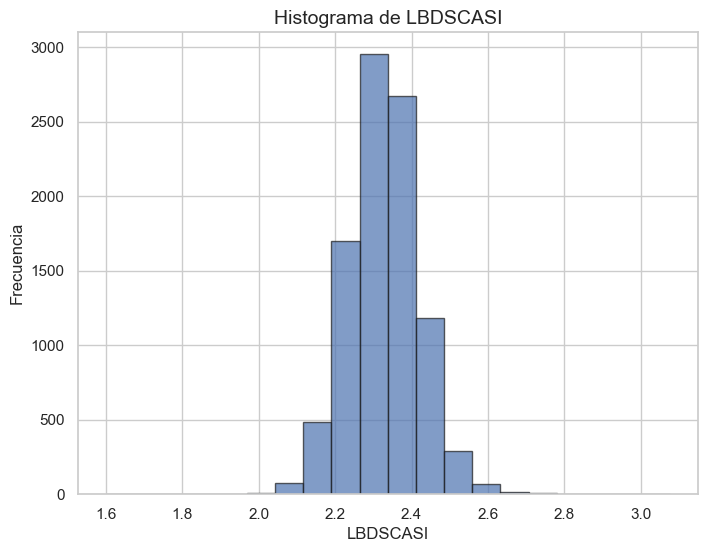

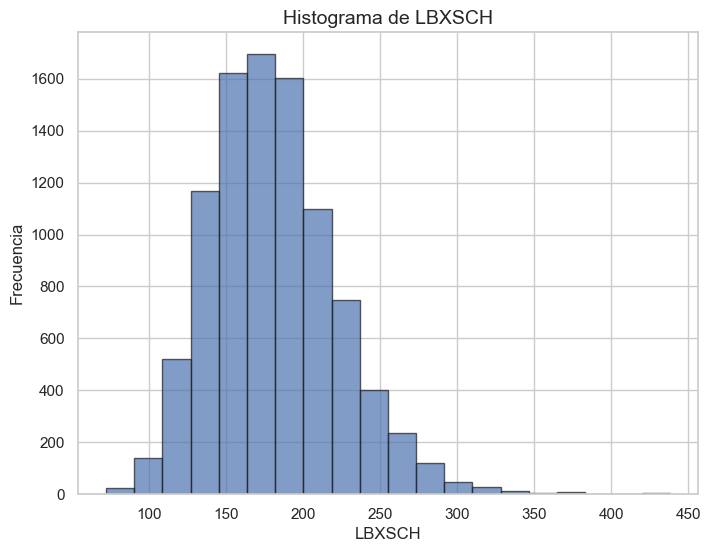

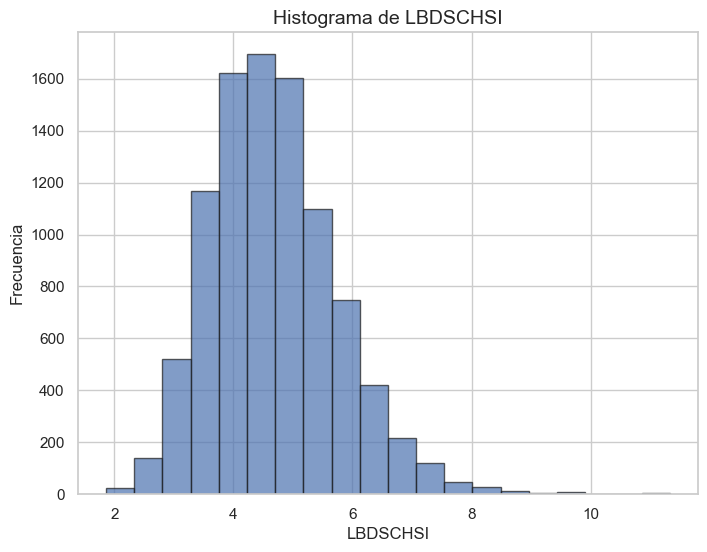

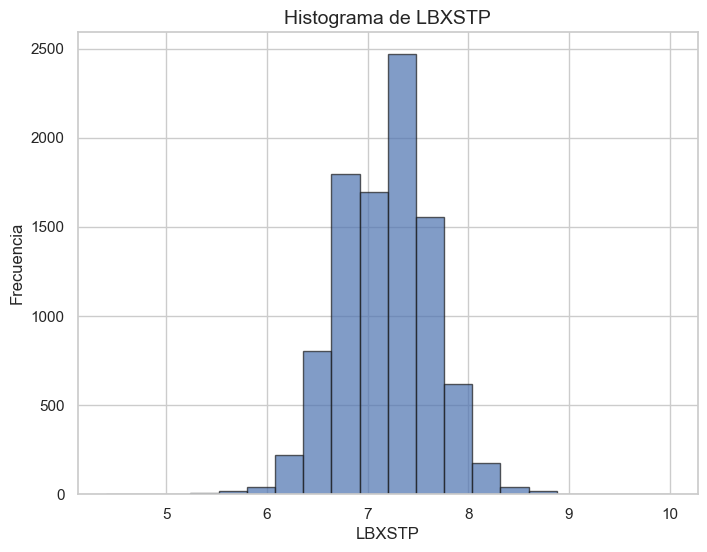

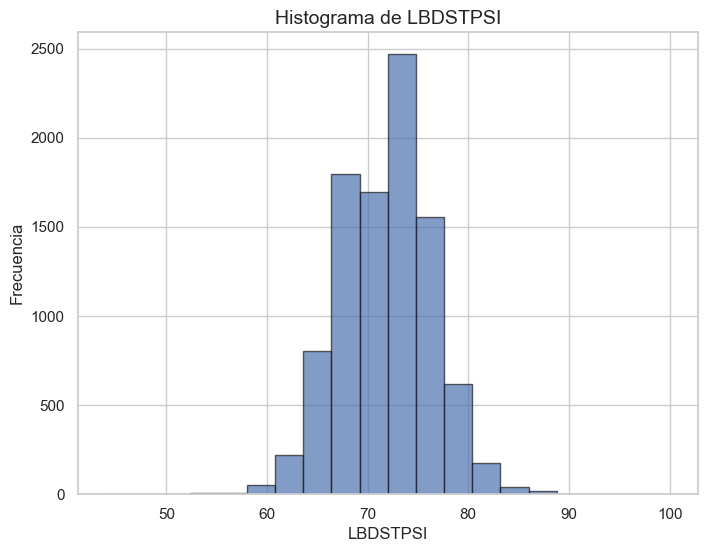

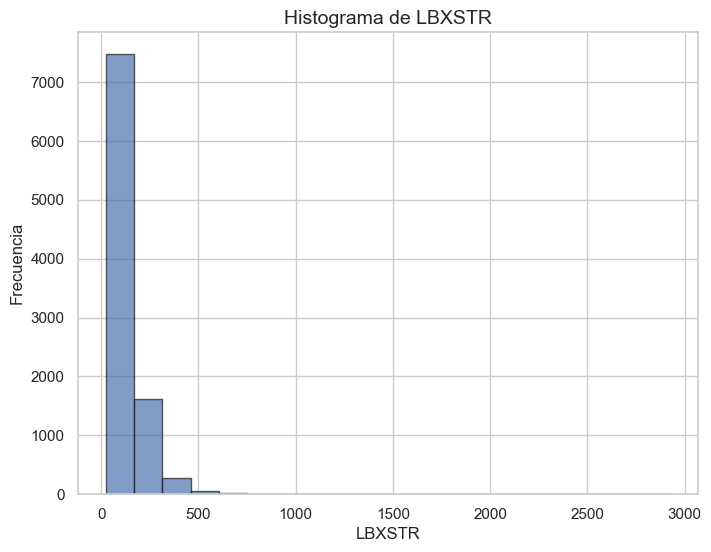

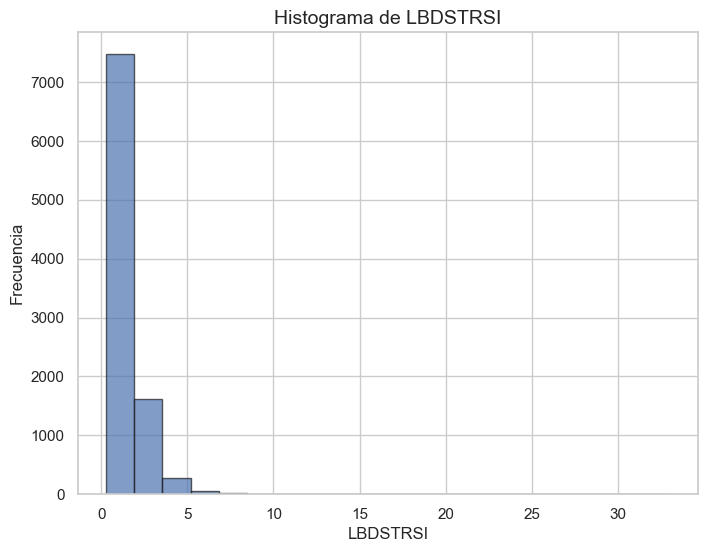

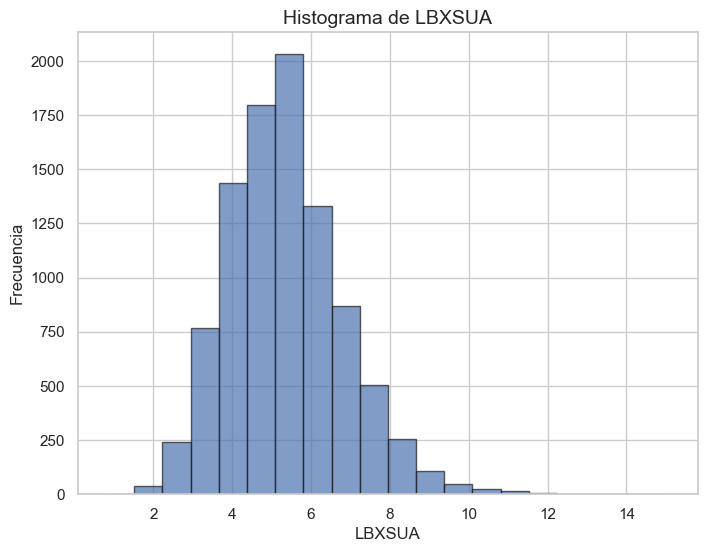

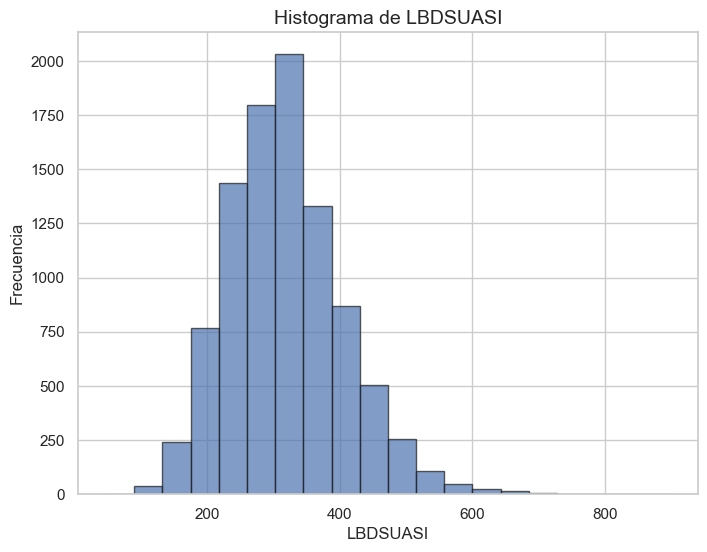

In [104]:
perfilB_numeric = perfilB.select_dtypes(include=[np.number])

for column in perfilB_numeric.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(perfilB_numeric[column].dropna(), bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histograma de {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()